# Alexandria Fansler - Midterm 2 - Spring 2023 - IMSE 641

# **Problem Statement: **

A PH manufacturing company produces pressure tubes where braising process wraps layers of material on a core. Two main quality characteristics of importance are the core diameter (y1) and the tube thickness (y2). Two laser divices can be used to measure the diameters of object passing through the laser guns – one before the core passes through the braiding rings and the other after the finished braiding product. Assuming that both quality characteristics contribute to the final diameter of the product after the time delays of the measurement are accounted for.

# a.	

(5 points) Analyze the data in the columns y1 and y2 to make sure that both data sets are i.i.d.. NOTE the first 100 observations are in the phase I control charts while the last 50 observations are for the phase II process monitoring. Discuss how and why you make such a conclusion. What should you do if some of the assumptions are violated. Data set link: https://www.dropbox.com/s/oyqy9myt30xwt1v/Midterm2-data.txt?dl=0 

**Solution part a: BOTTOMLINE: the dataset iid (rationale below).**:

i.i.d. stands for independently and identically distributed. We assume the samples are i.i.d. meaning the process is in steady state. The following checks should be performed: 1. Constant mean and variance (e.g. Change point algorithm shown below. 2. Independence vs. autocorrelation (e.g. QQ plots, normal distribution plot, ACF plots in Phase 2 also shown below)      Stationary vs. Non-stationary:   If a data series has constant mean and variance and passes the independent test, then we say the data is stationary. Otherwise, it is non-stationary 

Based on the QQ and normal plots below, we see that that data is independent, no correlation. Also, from below ACF plot shows that all spikes are small after lag 0 (the largest pike at lag0). Therefore, the data is independent.  Using the Change Point Detection: Pelt Search Method, we see there are no change points detected, therefore, the data is identically distributed, meaning the data is stationary with a constant mean and constant variance. 

In [405]:
# to validate iid, we do a QQ plot, e.g. Normal test shown below
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sc
import statsmodels.graphics.gofplots as sm
import statistics
from matplotlib.ticker import PercentFormatter
import pandas as pd
plt.style.use('seaborn-colorblind')

<ipython-input-405-dad399cadab7>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-colorblind')


In [406]:
from pandas.io.formats.info import DataFrameInfoPrinter
# to read in the data make sure that you use the raw format in Github
# the following input statement is needed to use pandas dataframe feature
import pandas as pd
dataAll = pd.read_csv('https://raw.githubusercontent.com/anfansler/IMSE641/main/Midterm2-data.txt', sep='\t',na_values='.')
dataAll

dataPhaseI = pd.read_csv('https://raw.githubusercontent.com/anfansler/IMSE641/main/Midterm2-data-PhaseI.csv', sep=',',na_values='.')
dataPhaseII = pd.read_csv('https://raw.githubusercontent.com/anfansler/IMSE641/main/Midterm2-data-PhaseII.csv', sep=',',na_values='.')

dataPhaseIy1 = pd.read_csv('https://raw.githubusercontent.com/anfansler/IMSE641/main/Midterm2-data-PhaseI-y1.csv', sep=',',na_values='.')
dataPhaseIy2 = pd.read_csv('https://raw.githubusercontent.com/anfansler/IMSE641/main/Midterm2-data-PhaseI-y2.csv', sep=',',na_values='.')
dataPhaseIIy1 = pd.read_csv('https://raw.githubusercontent.com/anfansler/IMSE641/main/Midterm2-data-PhaseII-y1.csv', sep=',',na_values='.')
dataPhaseIIy2 = pd.read_csv('https://raw.githubusercontent.com/anfansler/IMSE641/main/Midterm2-data-PhaseII-y2.csv', sep=',',na_values='.')

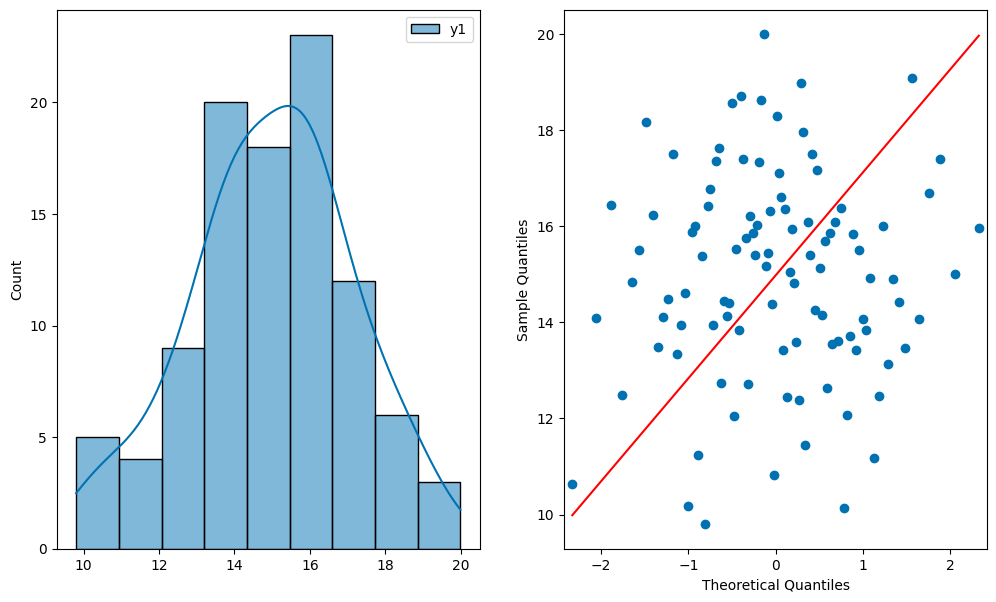

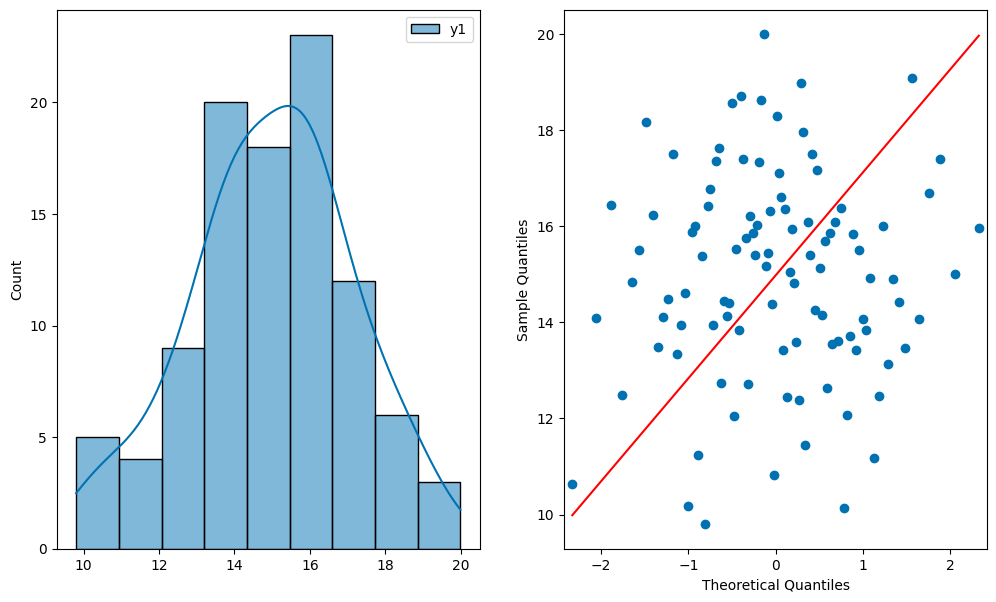

In [407]:
# plots for standard distribution PhaseI y1
fig, ax = plt.subplots(1, 2, figsize=(12, 7))
sns.histplot(dataPhaseIy1,kde=True, color ='blue',ax=ax[0])
sm.ProbPlot(dataPhaseIy1).qqplot(line='s', ax=ax[1])

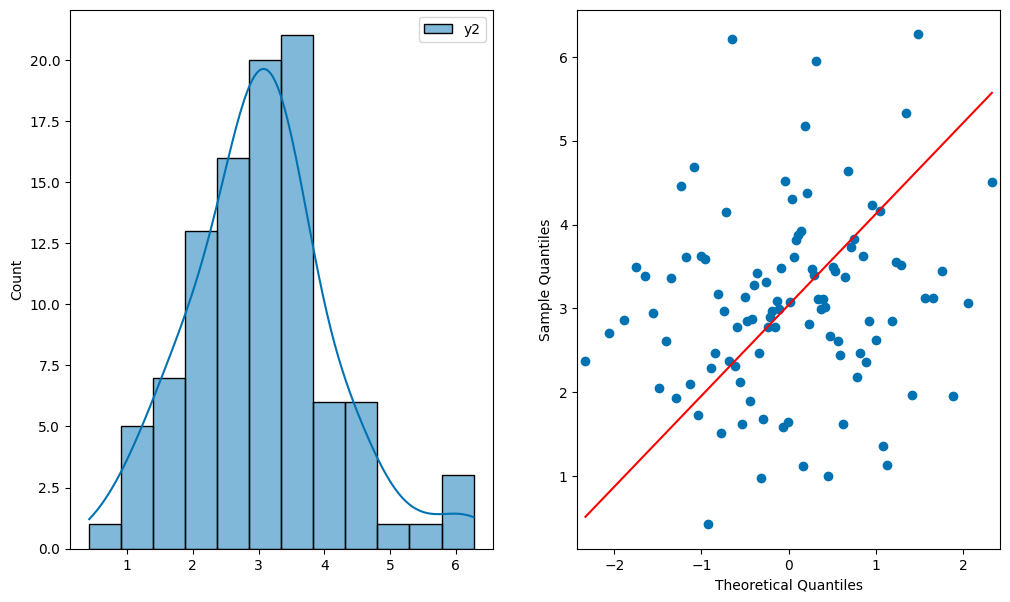

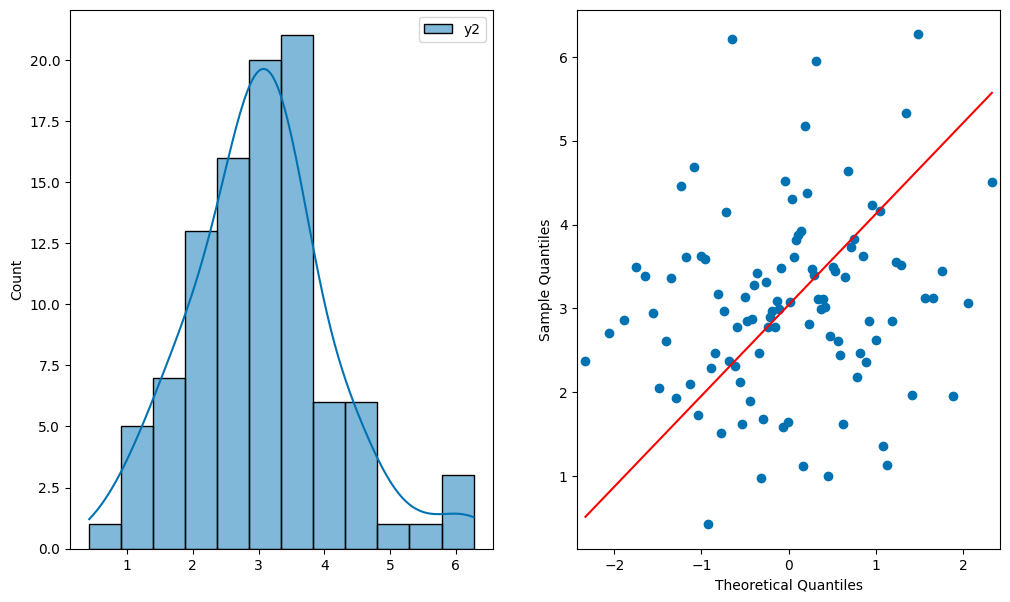

In [408]:
# plots for standard distribution PhaseI y2
fig, ax = plt.subplots(1, 2, figsize=(12, 7))
sns.histplot(dataPhaseIy2,kde=True, color ='blue',ax=ax[0])
sm.ProbPlot(dataPhaseIy2).qqplot(line='s', ax=ax[1])

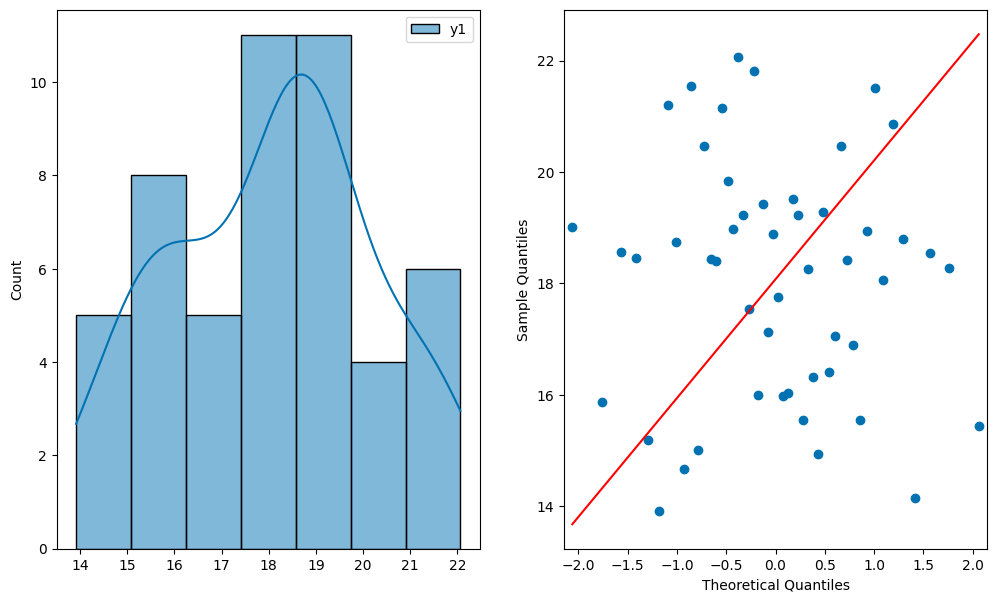

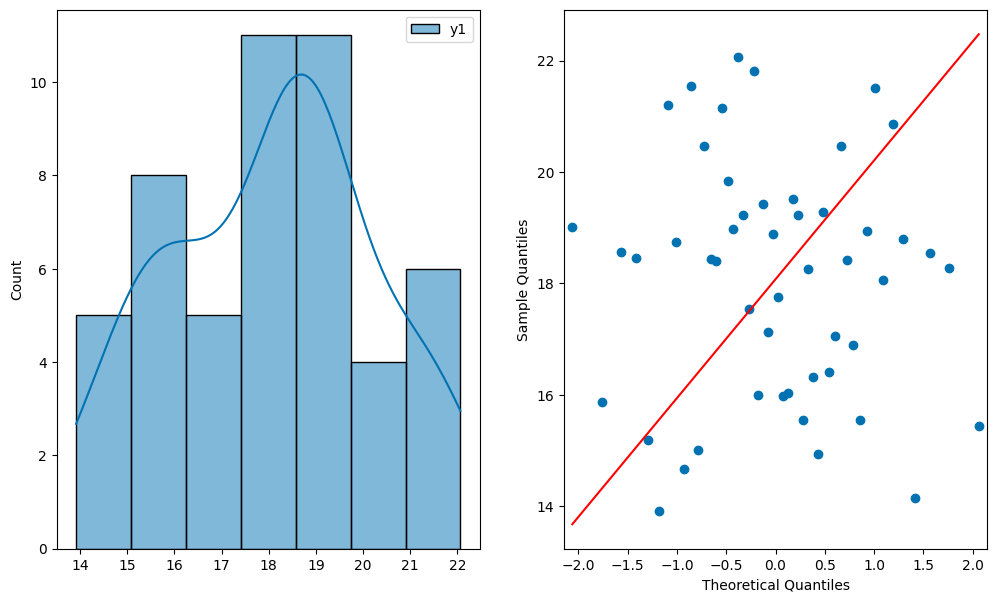

In [409]:
# plots for standard distribution PhaseII y1
fig, ax = plt.subplots(1, 2, figsize=(12, 7))
sns.histplot(dataPhaseIIy1,kde=True, color ='blue',ax=ax[0])
sm.ProbPlot(dataPhaseIIy1).qqplot(line='s', ax=ax[1])

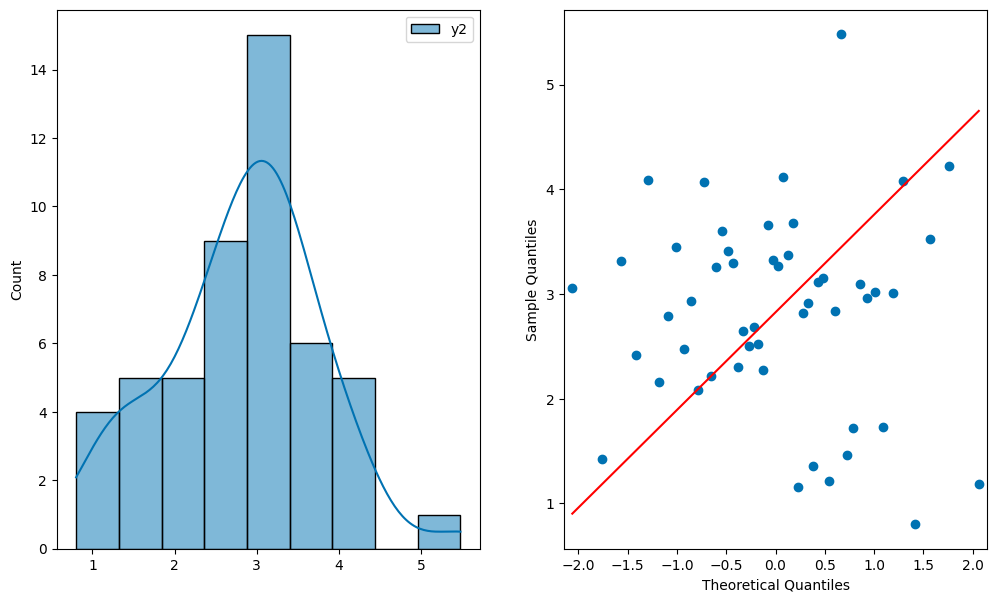

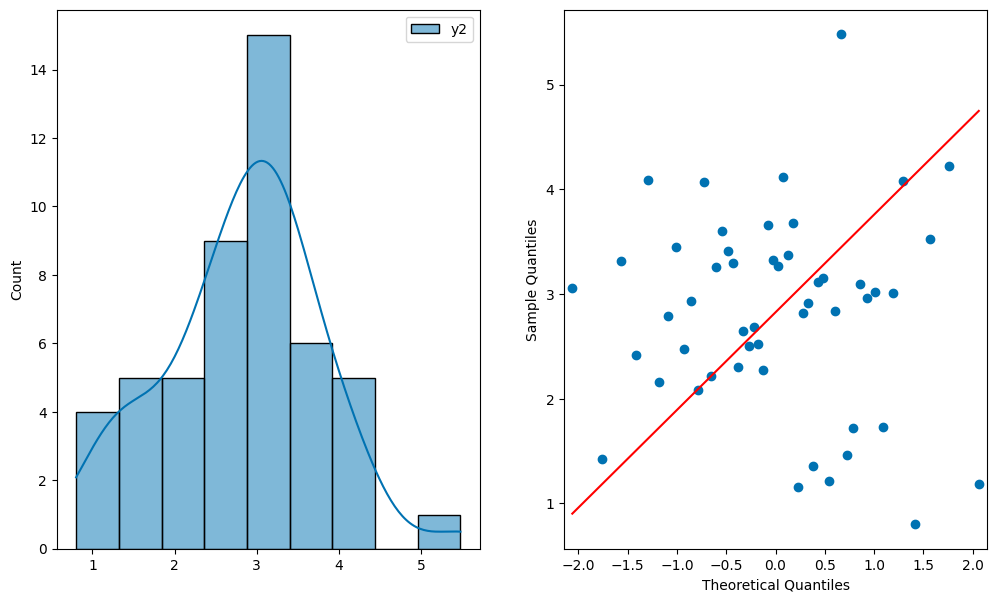

In [410]:
# plots for standard distribution PhaseII y2
fig, ax = plt.subplots(1, 2, figsize=(12, 7))
sns.histplot(dataPhaseIIy2,kde=True, color ='blue',ax=ax[0])
sm.ProbPlot(dataPhaseIIy2).qqplot(line='s', ax=ax[1])

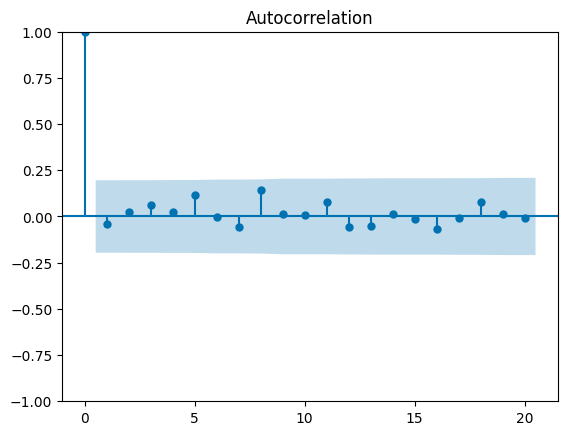

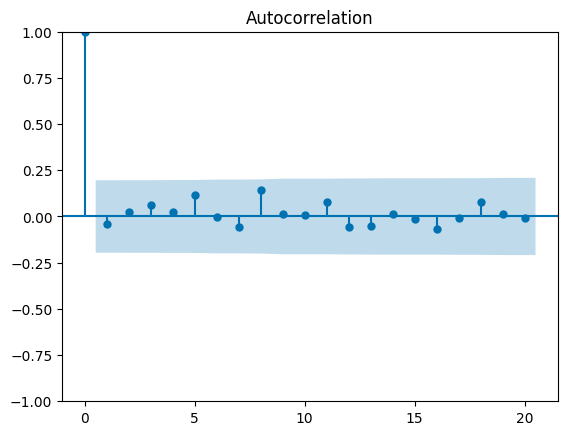

In [411]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(dataPhaseIy1, lags=20)

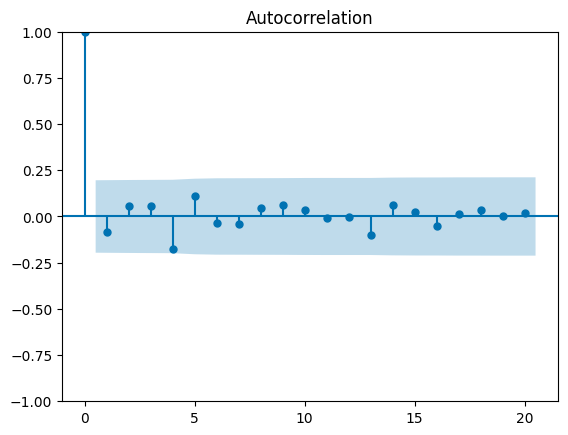

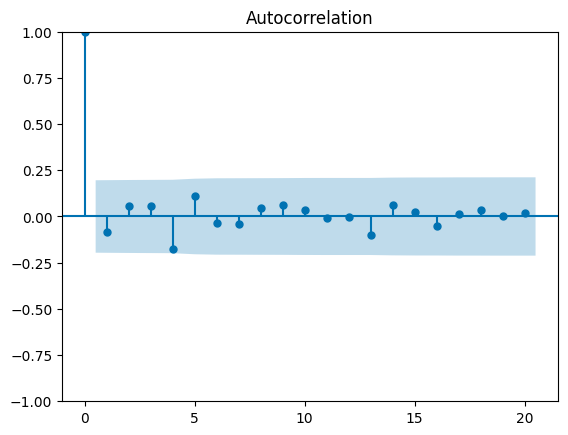

In [412]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(dataPhaseIy2, lags=20)

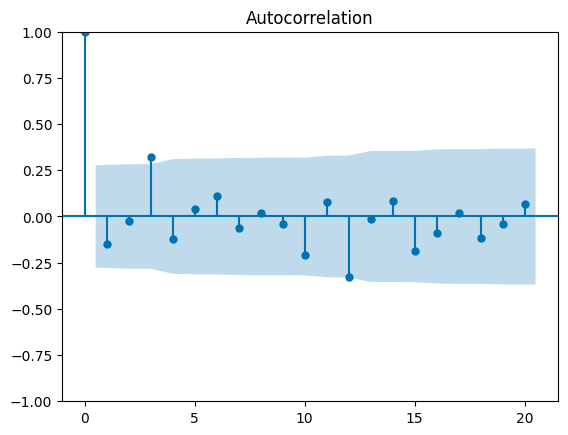

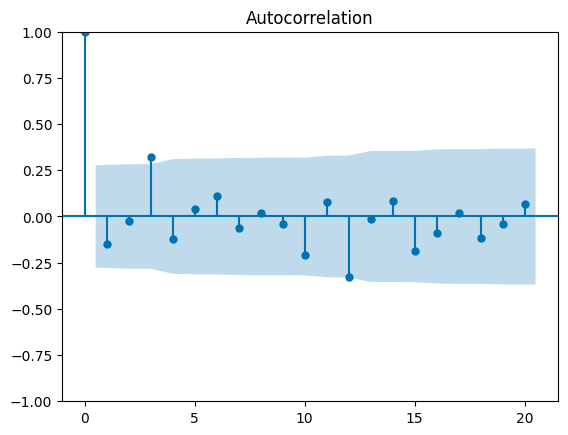

In [413]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(dataPhaseIIy1, lags=20)

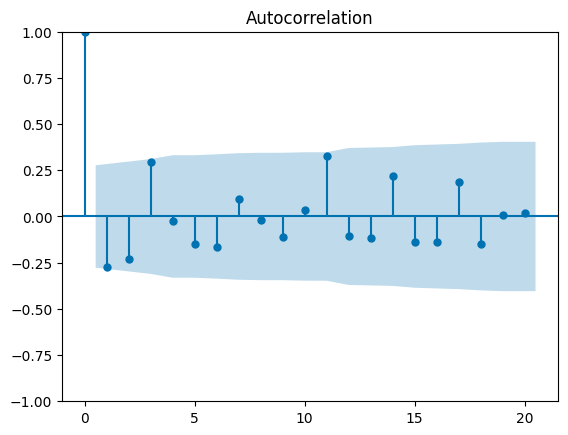

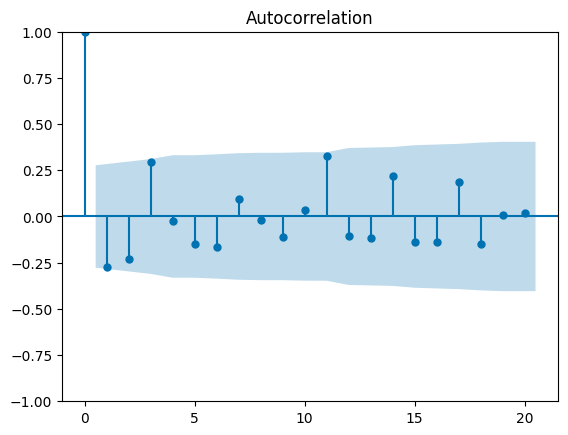

In [414]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(dataPhaseIIy2, lags=20)

In [415]:
#NOW WE DO CHANGE POINT TO DETERMINE CONSTANT MEAN AND CONSTANT VARIANCE 

# install the package ruptures
!pip install ruptures

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [416]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import eia
#import changefinder
import ruptures as rpt

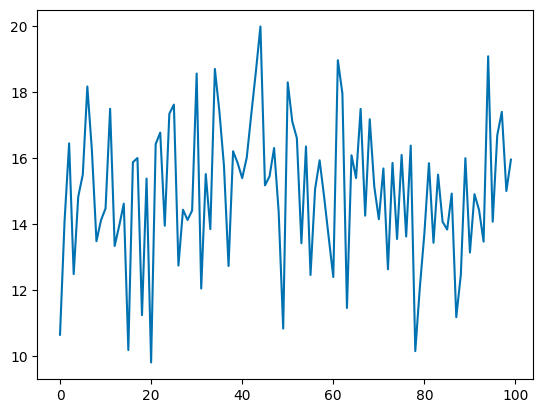

In [417]:
# visualize the time series
plt.plot(dataPhaseIy1)


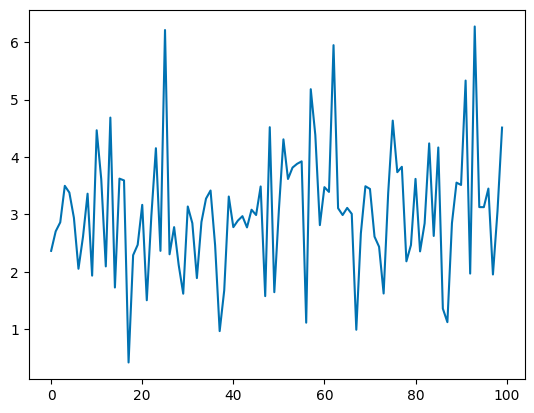

In [418]:
plt.plot(dataPhaseIy2)


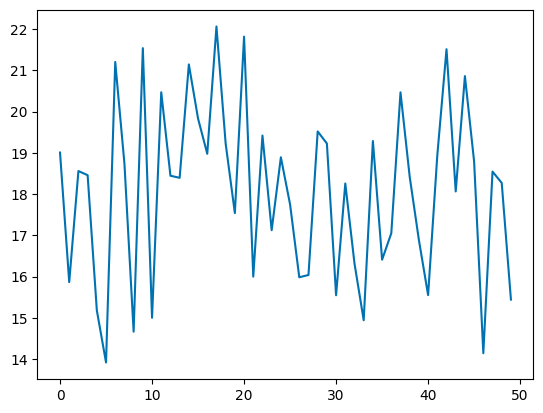

In [419]:
plt.plot(dataPhaseIIy1)


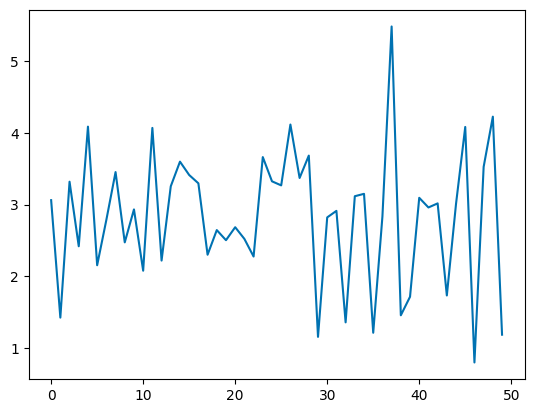

In [420]:
plt.plot(dataPhaseIIy2)

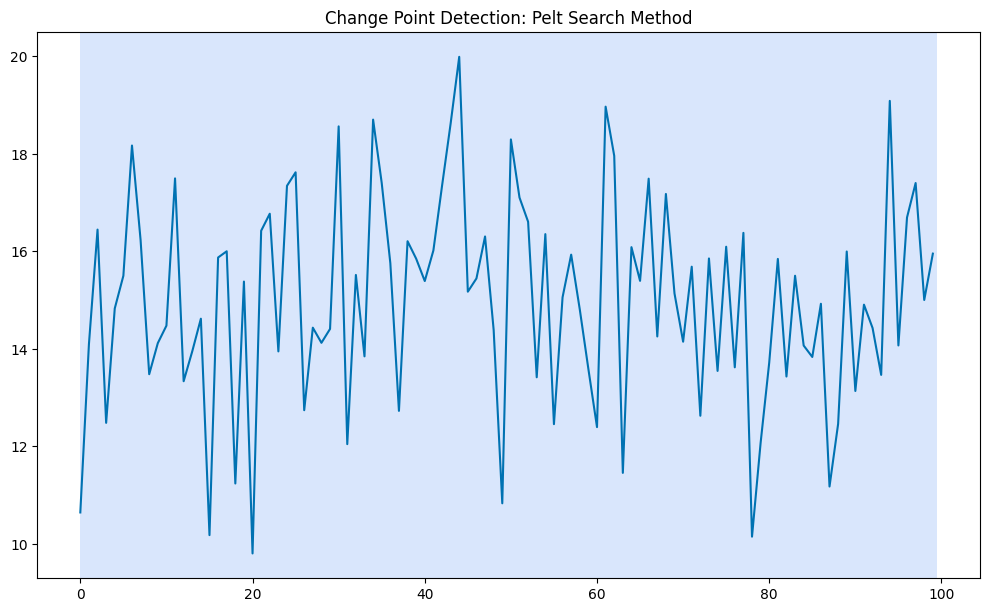

In [421]:
#RUPTURES PACKAGE
#Changepoint detection with the Pelt search method
model="rbf"
algo = rpt.Pelt(model=model).fit(dataPhaseIy1)
result = algo.predict(pen=10)
rpt.display(dataPhaseIy1, result, figsize=(10, 6))
plt.title('Change Point Detection: Pelt Search Method')
plt.show()  

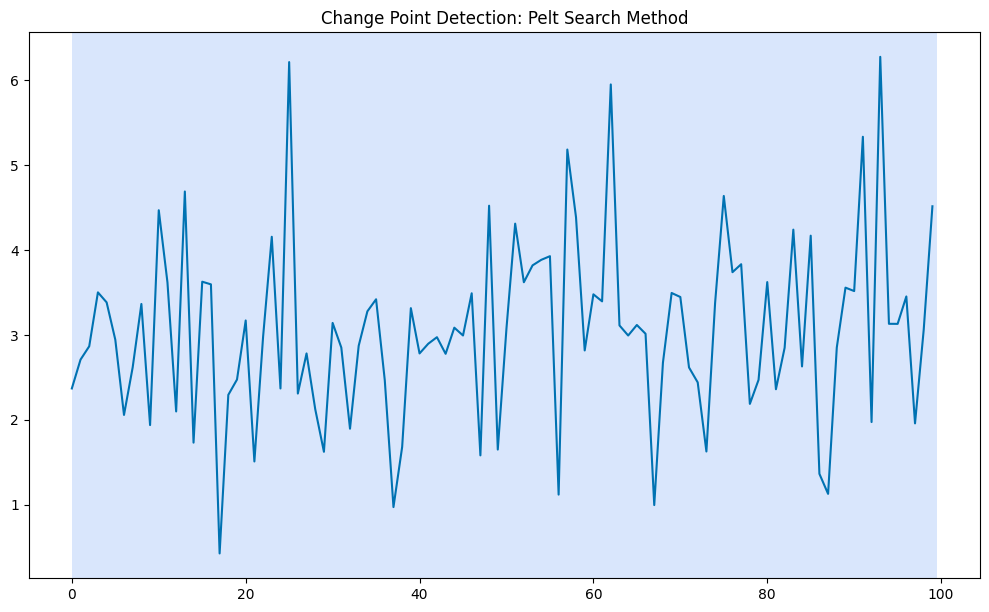

In [422]:
#RUPTURES PACKAGE
#Changepoint detection with the Pelt search method
model="rbf"
algo = rpt.Pelt(model=model).fit(dataPhaseIy2)
result = algo.predict(pen=10)
rpt.display(dataPhaseIy2, result, figsize=(10, 6))
plt.title('Change Point Detection: Pelt Search Method')
plt.show()  

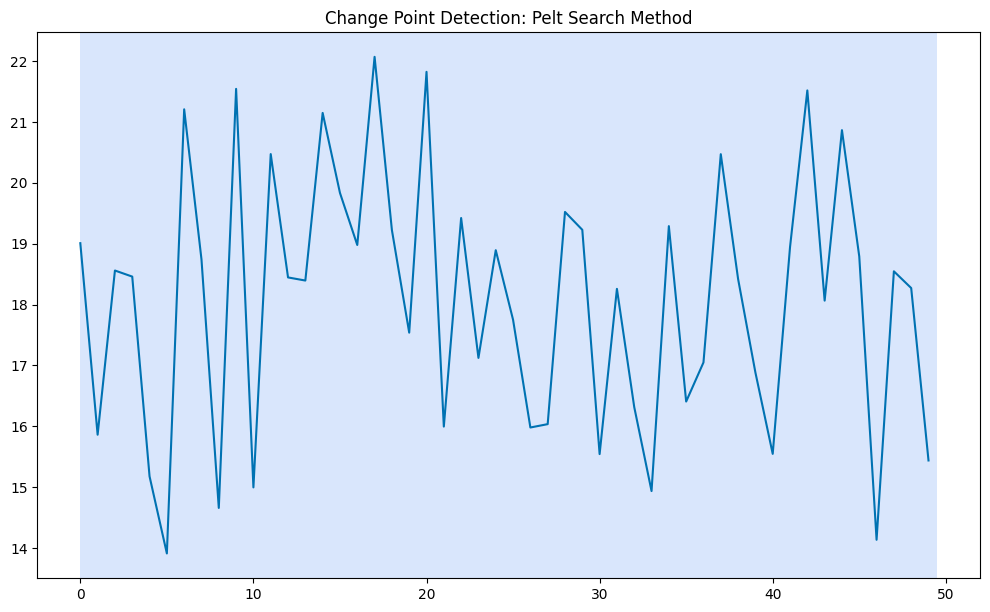

In [423]:
#RUPTURES PACKAGE
#Changepoint detection with the Pelt search method
model="rbf"
algo = rpt.Pelt(model=model).fit(dataPhaseIIy1)
result = algo.predict(pen=10)
rpt.display(dataPhaseIIy1, result, figsize=(10, 6))
plt.title('Change Point Detection: Pelt Search Method')
plt.show()  

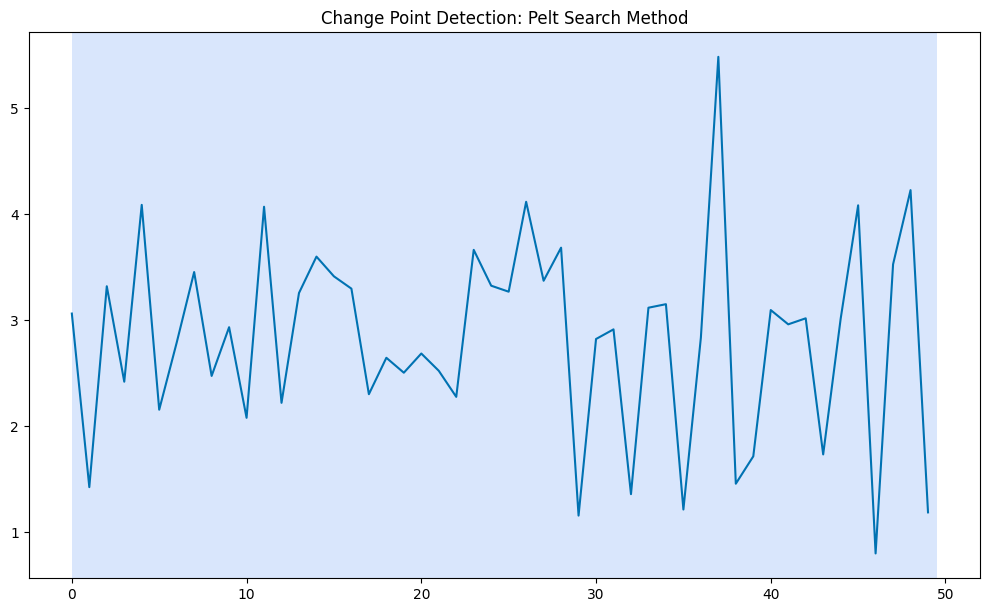

In [424]:
#RUPTURES PACKAGE
#Changepoint detection with the Pelt search method
model="rbf"
algo = rpt.Pelt(model=model).fit(dataPhaseIIy2)
result = algo.predict(pen=10)
rpt.display(dataPhaseIIy2, result, figsize=(10, 6))
plt.title('Change Point Detection: Pelt Search Method')
plt.show()  

# b.	

(5 points) Use the first 100 observations to set up X-bar and R charts on y1 (n=5) as the Phase I process and the last 50 observations of the Phase II process.  Discuss how and why you make such a conclusion.

***Solution part b: BOTTOMLINE: As observed in X-bar chart below, the Phase II shows that the process is exibiting a slight mean shift after observation 90 because the data is consistently above the mean line. ***

Phase I data, there are no clear mean shifts detectable on the x-bar chart. 

In [206]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics

In [207]:
from pandas.io.formats.info import DataFrameInfoPrinter
# to read in the data make sure that you use the raw format in Github
# the following input statement is needed to use pandas dataframe feature
import pandas as pd
dataAll = pd.read_csv('https://raw.githubusercontent.com/anfansler/IMSE641/main/Midterm2-data.txt', sep='\t',na_values='.')

dataPhaseI = pd.read_csv('https://raw.githubusercontent.com/anfansler/IMSE641/main/Midterm2-data-PhaseI.csv', sep=',',na_values='.')
dataPhaseII = pd.read_csv('https://raw.githubusercontent.com/anfansler/IMSE641/main/Midterm2-data-PhaseII.csv', sep=',',na_values='.')

dataPhaseIy1 = pd.read_csv('https://raw.githubusercontent.com/anfansler/IMSE641/main/Midterm2-data-PhaseI-y1.csv', sep=',',na_values='.')
dataPhaseIy2 = pd.read_csv('https://raw.githubusercontent.com/anfansler/IMSE641/main/Midterm2-data-PhaseI-y2.csv', sep=',',na_values='.')
dataPhaseIIy1 = pd.read_csv('https://raw.githubusercontent.com/anfansler/IMSE641/main/Midterm2-data-PhaseII-y1.csv', sep=',',na_values='.')
dataPhaseIIy2 = pd.read_csv('https://raw.githubusercontent.com/anfansler/IMSE641/main/Midterm2-data-PhaseII-y2.csv', sep=',',na_values='.')

dataPhaseIarr =[dataPhaseI[['y1','y2']]]
dataPhaseIarr


[         y1       y2
 0   10.6424  2.36723
 1   14.0940  2.70679
 2   16.4463  2.86357
 3   12.4810  3.49823
 4   14.8288  3.38062
 ..      ...      ...
 95  14.0691  3.12741
 96  16.6952  3.45019
 97  17.4013  1.95613
 98  15.0023  3.05843
 99  15.9530  4.51147
 
 [100 rows x 2 columns]]

In [208]:
# this np.reshape convert the list dataI into the proper subgroup and m=100
x = np.reshape(dataPhaseIarr, (100,2))
x

array([[10.6424 ,  2.36723],
       [14.094  ,  2.70679],
       [16.4463 ,  2.86357],
       [12.481  ,  3.49823],
       [14.8288 ,  3.38062],
       [15.4986 ,  2.94089],
       [18.1712 ,  2.05572],
       [16.2308 ,  2.61631],
       [13.4792 ,  3.36159],
       [14.117  ,  1.9361 ],
       [14.4749 ,  4.46486],
       [17.4969 ,  3.61496],
       [13.3352 ,  2.09649],
       [13.949  ,  4.68546],
       [14.6177 ,  1.72947],
       [10.1771 ,  3.62369],
       [15.8735 ,  3.5925 ],
       [16.0014 ,  0.42532],
       [11.2366 ,  2.2918 ],
       [15.3799 ,  2.47218],
       [ 9.8013 ,  3.16742],
       [16.4225 ,  1.50788],
       [16.7719 ,  2.97379],
       [13.9469 ,  4.15259],
       [17.3446 ,  2.36699],
       [17.6218 ,  6.20852],
       [12.7403 ,  2.30741],
       [14.4338 ,  2.77957],
       [14.1232 ,  2.12323],
       [14.4082 ,  1.62192],
       [18.5641 ,  3.13863],
       [12.0441 ,  2.84845],
       [15.5157 ,  1.89346],
       [13.8452 ,  2.86982],
       [18.702

In [209]:
# Define list variable for groups means
x_bar = []

# Define list variable for groups ranges
r = [] 

In [210]:
# Get and append groups means and ranges
# if you run this cell multiple times, then the data series will be repeated
for group in x:
    x_bar.append(group.mean())
    r.append(group.max() - group.min())
print(x_bar)
print(r)
m=len(x_bar)
print('points in x, ', m)

[6.504815000000001, 8.400395, 9.654935, 7.989615, 9.104709999999999, 9.219745, 10.11346, 9.423554999999999, 8.420395000000001, 8.02655, 9.46988, 10.55593, 7.715845, 9.31723, 8.173585, 6.900395, 9.733, 8.21336, 6.7642, 8.92604, 6.48436, 8.96519, 9.872845, 9.049745, 9.855795, 11.91516, 7.523854999999999, 8.606685, 8.123215, 8.01506, 10.851365, 7.446275, 8.70458, 8.35751, 10.98891, 10.40968, 9.1111, 6.848789999999999, 8.943494999999999, 9.580824999999999, 9.085040000000001, 9.455785, 10.153525, 10.696584999999999, 11.5368, 9.081415, 9.46542, 8.942215000000001, 9.45162, 6.23904, 10.685519999999999, 10.70523, 10.11204, 8.61588, 10.117175, 8.189055, 8.08709, 10.55583, 9.59513, 8.199615, 7.934335, 11.180444999999999, 11.95254, 7.281804999999999, 9.53793, 9.2546, 10.25096, 7.6240950000000005, 9.92413, 9.3131, 8.795035, 9.149650000000001, 7.532495, 8.73962, 8.45952, 10.36384, 8.67801, 10.104330000000001, 6.1655549999999995, 7.27004, 8.669265, 9.101379999999999, 8.138685, 9.867844999999999, 8.34

[Text(0.5, 0, 'Group'), Text(0, 0.5, 'Range')]

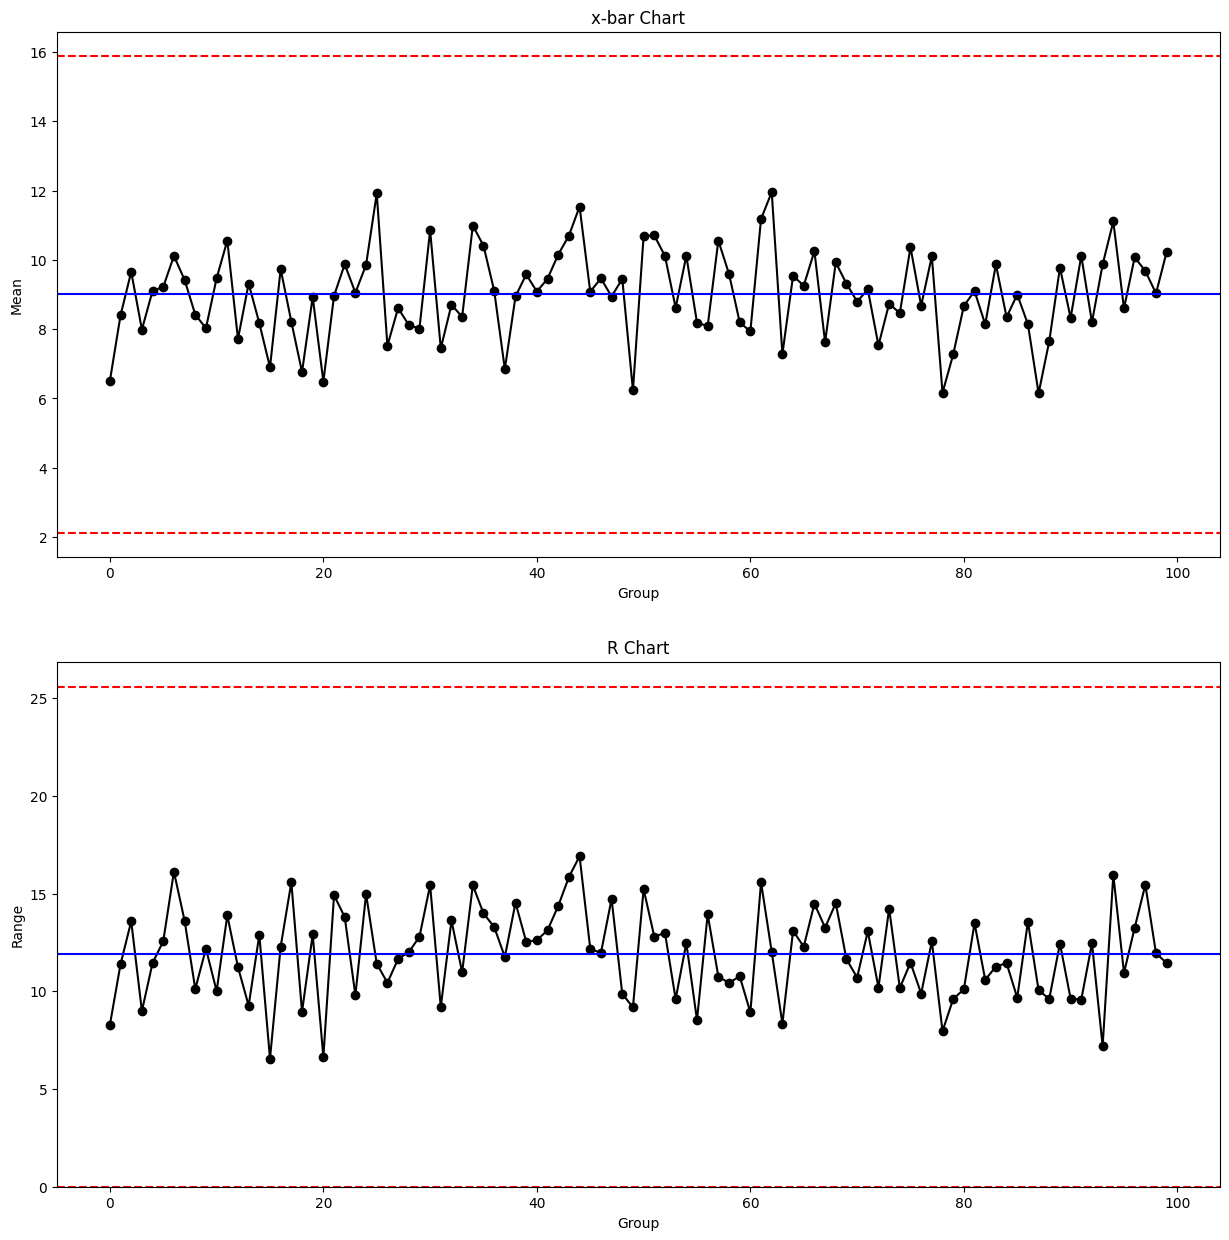

In [211]:
# Plot x-bar and R charts
fig, axs = plt.subplots(2, figsize=(15,15))

# x-bar chart
# Chart parameters A2=0.577, D3, and D4 see the ref for other sample size
A2=0.577 #n=5
D3=0     #n=5
D4=2.144 #n=5

axs[0].plot(x_bar, linestyle='-', marker='o', color='black')
axs[0].axhline((statistics.mean(x_bar)+A2*statistics.mean(r)), color='red', linestyle='dashed')
axs[0].axhline((statistics.mean(x_bar)-A2*statistics.mean(r)), color='red', linestyle='dashed')
axs[0].axhline((statistics.mean(x_bar)), color='blue')
axs[0].set_title('x-bar Chart')
axs[0].set(xlabel='Group', ylabel='Mean')

# R chart
axs[1].plot(r, linestyle='-', marker='o', color='black')
axs[1].axhline((D4*statistics.mean(r)), color='red', linestyle='dashed')
axs[1].axhline((D3*statistics.mean(r)), color='red', linestyle='dashed')
axs[1].axhline((statistics.mean(r)), color='blue')
axs[1].set_ylim(bottom=0)
axs[1].set_title('R Chart')
axs[1].set(xlabel='Group', ylabel='Range')

In [212]:
# Validate points out of control limits for x-bar chart
i = 0
control = True
for group in x_bar:
    if group > statistics.mean(x_bar)+A2*statistics.mean(r) or group < statistics.mean(x_bar)-A2*statistics.mean(r):
        print('Group', i, 'out of mean control limits!')
        control = False
    i += 1
if control == True:
    print('All points within control limits.')

All points within control limits.


In [213]:
# Validate points out of control limits for R chart
i = 0
control = True
for group in r:
    if group > D4*statistics.mean(r):
        print('Group', i, 'out of range cotrol limits!')
        control = False
    i += 1
if control == True:
    print('All points within control limits.')

All points within control limits.


Phase II

In [425]:
dataPhaseIIarr =[dataPhaseII[['y1','y2']]]
dataPhaseIIarr

[         y1       y2
 0   19.0070  3.06248
 1   15.8642  1.42643
 2   18.5584  3.31967
 3   18.4586  2.42027
 4   15.1805  4.08682
 5   13.9162  2.15600
 6   21.2035  2.78811
 7   18.7396  3.45371
 8   14.6630  2.47455
 9   21.5389  2.93380
 10  14.9999  2.07993
 11  20.4689  4.06909
 12  18.4451  2.22109
 13  18.3939  3.25598
 14  21.1440  3.59908
 15  19.8316  3.41307
 16  18.9773  3.29723
 17  22.0645  2.30240
 18  19.2230  2.64564
 19  17.5390  2.50492
 20  21.8183  2.68581
 21  15.9978  2.52301
 22  19.4199  2.27729
 23  17.1247  3.66273
 24  18.8920  3.32500
 25  17.7501  3.26845
 26  15.9827  4.11585
 27  16.0378  3.37163
 28  19.5195  3.68337
 29  19.2262  1.15818
 30  15.5464  2.82252
 31  18.2574  2.91340
 32  16.3183  1.36028
 33  14.9400  3.11747
 34  19.2868  3.15074
 35  16.4086  1.21549
 36  17.0502  2.83501
 37  20.4672  5.48203
 38  18.4197  1.45871
 39  16.8850  1.71677
 40  15.5503  3.09539
 41  18.9409  2.96083
 42  21.5134  3.01760
 43  18.0643  1.73488
 44  20.86

In [427]:
# this np.reshape convert the list dataI into the proper subgroup and m=100
xp2 = np.reshape(dataPhaseIIarr, (50,2))
xp2

array([[19.007  ,  3.06248],
       [15.8642 ,  1.42643],
       [18.5584 ,  3.31967],
       [18.4586 ,  2.42027],
       [15.1805 ,  4.08682],
       [13.9162 ,  2.156  ],
       [21.2035 ,  2.78811],
       [18.7396 ,  3.45371],
       [14.663  ,  2.47455],
       [21.5389 ,  2.9338 ],
       [14.9999 ,  2.07993],
       [20.4689 ,  4.06909],
       [18.4451 ,  2.22109],
       [18.3939 ,  3.25598],
       [21.144  ,  3.59908],
       [19.8316 ,  3.41307],
       [18.9773 ,  3.29723],
       [22.0645 ,  2.3024 ],
       [19.223  ,  2.64564],
       [17.539  ,  2.50492],
       [21.8183 ,  2.68581],
       [15.9978 ,  2.52301],
       [19.4199 ,  2.27729],
       [17.1247 ,  3.66273],
       [18.892  ,  3.325  ],
       [17.7501 ,  3.26845],
       [15.9827 ,  4.11585],
       [16.0378 ,  3.37163],
       [19.5195 ,  3.68337],
       [19.2262 ,  1.15818],
       [15.5464 ,  2.82252],
       [18.2574 ,  2.9134 ],
       [16.3183 ,  1.36028],
       [14.94   ,  3.11747],
       [19.286

In [429]:
# Define list variable for groups means
xp2_bar = []

# Define list variable for groups ranges
rp2 = [] 

In [431]:
# Get and append groups means and ranges
# if you run this cell multiple times, then the data series will be repeated
for group in xp2:
    xp2_bar.append(group.mean())
    rp2.append(group.max() - group.min())
print(xp2_bar)
print(rp2)
m=len(xp2_bar)
print('points in xp2, ', m)

[11.034740000000001, 8.645315, 10.939034999999999, 10.439435, 9.63366, 8.0361, 11.995804999999999, 11.096655, 8.568775, 12.236350000000002, 8.539915, 12.268995, 10.333095, 10.82494, 12.37154, 11.622335000000001, 11.137265, 12.183449999999999, 10.93432, 10.02196, 12.252055, 9.260405, 10.848595, 10.393715, 11.1085, 10.509275, 10.049275, 9.704715, 11.601435, 10.19219, 9.18446, 10.5854, 8.83929, 9.028735, 11.21877, 8.812045, 9.942605, 12.974615, 9.939205, 9.300885000000001, 9.322845000000001, 10.950865, 12.2655, 9.89959, 11.93699, 11.43559, 7.47098, 11.035945, 11.248240000000001, 8.315145000000001]
[15.94452, 14.43777, 15.238729999999999, 16.038330000000002, 11.093679999999999, 11.7602, 18.41539, 15.285889999999998, 12.18845, 18.6051, 12.91997, 16.399810000000002, 16.22401, 15.137919999999998, 17.544919999999998, 16.41853, 15.68007, 19.7621, 16.57736, 15.034080000000001, 19.13249, 13.474789999999999, 17.142609999999998, 13.46197, 15.567, 14.48165, 11.86685, 12.666170000000001, 15.83613, 18

[Text(0.5, 0, 'Group'), Text(0, 0.5, 'Range')]

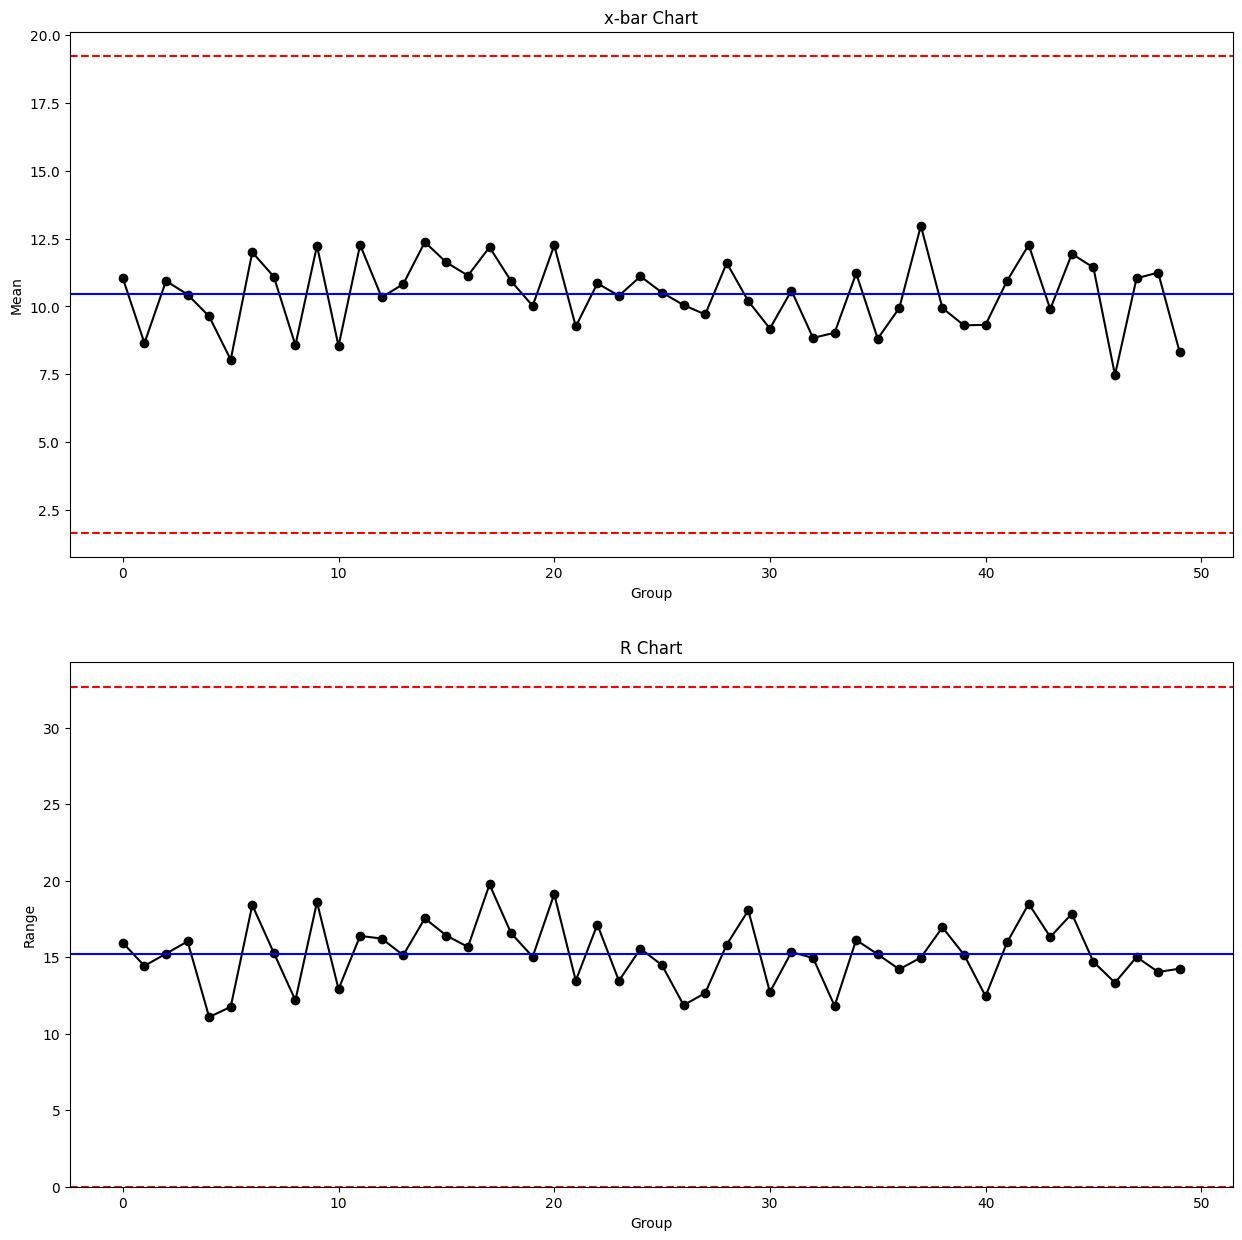

In [432]:
# Plot x-bar and R charts
fig, axs = plt.subplots(2, figsize=(15,15))

# x-bar chart
# Chart parameters A2=0.577, D3, and D4 see the ref for other sample size
A2=0.577 #n=5
D3=0     #n=5
D4=2.144 #n=5

axs[0].plot(xp2_bar, linestyle='-', marker='o', color='black')
axs[0].axhline((statistics.mean(xp2_bar)+A2*statistics.mean(rp2)), color='red', linestyle='dashed')
axs[0].axhline((statistics.mean(xp2_bar)-A2*statistics.mean(rp2)), color='red', linestyle='dashed')
axs[0].axhline((statistics.mean(xp2_bar)), color='blue')
axs[0].set_title('x-bar Chart')
axs[0].set(xlabel='Group', ylabel='Mean')

# R chart
axs[1].plot(rp2, linestyle='-', marker='o', color='black')
axs[1].axhline((D4*statistics.mean(rp2)), color='red', linestyle='dashed')
axs[1].axhline((D3*statistics.mean(rp2)), color='red', linestyle='dashed')
axs[1].axhline((statistics.mean(rp2)), color='blue')
axs[1].set_ylim(bottom=0)
axs[1].set_title('R Chart')
axs[1].set(xlabel='Group', ylabel='Range')

In [433]:
# Validate points out of control limits for x-bar chart
i = 0
control = True
for group in xp2_bar:
    if group > statistics.mean(x_bar)+A2*statistics.mean(rp2) or group < statistics.mean(xp2_bar)-A2*statistics.mean(rp2):
        print('Group', i, 'out of mean control limits!')
        control = False
    i += 1
if control == True:
    print('All points within control limits.')

All points within control limits.


In [434]:
# Validate points out of control limits for R chart
i = 0
control = True
for group in rp2:
    if group > D4*statistics.mean(rp2):
        print('Group', i, 'out of range cotrol limits!')
        control = False
    i += 1
if control == True:
    print('All points within control limits.')

All points within control limits.


Plot X-bar and R chart for the Phase II data using the sample mean and R-bar from the Phase I computation.

In [214]:
dataAllarr =[dataAll[['y1','y2']]]
dataAllarr

[          y1       y2
 0    10.6424  2.36723
 1    14.0940  2.70679
 2    16.4463  2.86357
 3    12.4810  3.49823
 4    14.8288  3.38062
 ..       ...      ...
 145  18.7887  4.08248
 146  14.1405  0.80146
 147  18.5453  3.52659
 148  18.2708  4.22568
 149  15.4418  1.18849
 
 [150 rows x 2 columns]]

In [215]:
# this np.reshape convert the list dataI into the proper subgroup and m=45
x3=np.reshape(dataAllarr, (150,2))
# Define list variable for groups means
x_bar3 = []

# Define list variable for groups ranges
r3 = [] 

# Get and append groups means and ranges
# if you run this cell multiple times, then the data series will be repeated
for group in x3:
    x_bar3.append(group.mean())
    r3.append(group.max() - group.min())

m=len(x_bar3)
print('points in x, ', m)

points in x,  150


Plot the Phase II data only instead of plotting all data

[Text(0.5, 0, 'Group'), Text(0, 0.5, 'Range')]

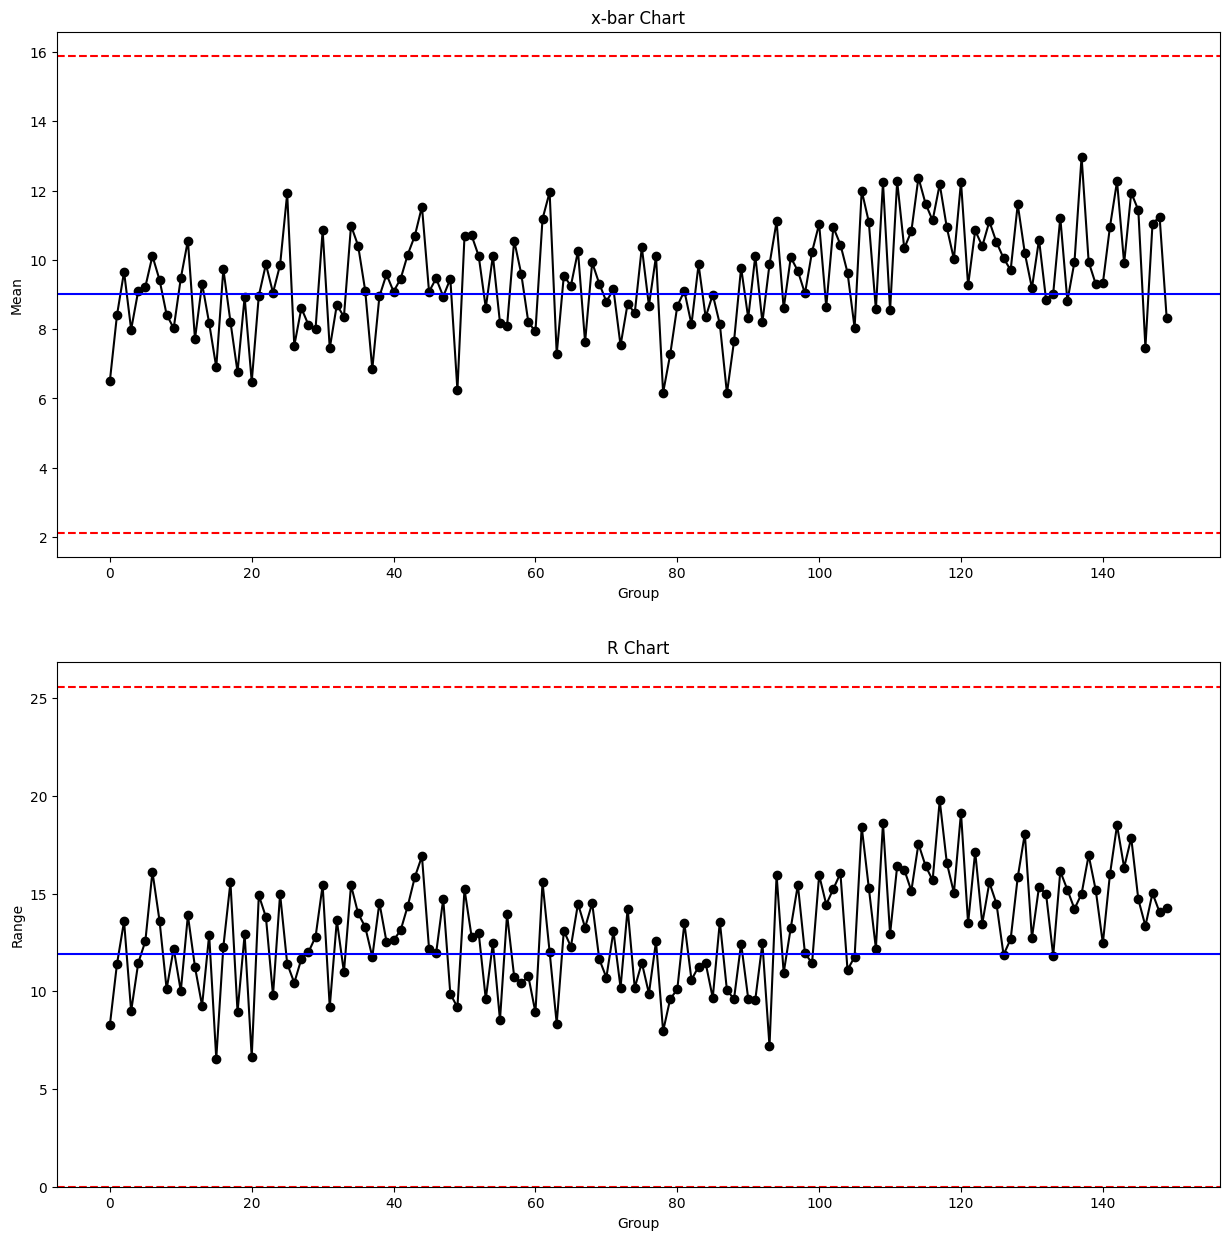

In [216]:
# Plot x-bar and R charts for all data points
# make sure the x-bar-bar and r-bar are from phase I computation
# validate that using the X-bar and R charts previously generated
fig, axs = plt.subplots(2, figsize=(15,15))

# x-bar chart
# Chart parameters A2=0.577, D3, and D4 see the ref for other sample size
A2=0.577 #n=5
D3=0     #n=5
D4=2.144 #n=5

axs[0].plot(x_bar3, linestyle='-', marker='o', color='black')
# note that the x-bar and r bar are from Phase data
axs[0].axhline((statistics.mean(x_bar)+A2*statistics.mean(r)), color='red', linestyle='dashed')
axs[0].axhline((statistics.mean(x_bar)-A2*statistics.mean(r)), color='red', linestyle='dashed')
axs[0].axhline((statistics.mean(x_bar)), color='blue')
axs[0].set_title('x-bar Chart')
axs[0].set(xlabel='Group', ylabel='Mean')

# R chart
axs[1].plot(r3, linestyle='-', marker='o', color='black')
# note that the x-bar and r bar are from Phase data
axs[1].axhline((D4*statistics.mean(r)), color='red', linestyle='dashed')
axs[1].axhline((D3*statistics.mean(r)), color='red', linestyle='dashed')
axs[1].axhline((statistics.mean(r)), color='blue')
axs[1].set_ylim(bottom=0)
axs[1].set_title('R Chart')
axs[1].set(xlabel='Group', ylabel='Range')

As observed in X-bar chart, the Phase II shows that the process is exibiting a mean shift after observation 90

# c.	

(5 points) Then run IX/MR control charts (n=1) on y1. Use the three-sigma control limits and report the process variation used, the center line, and the control limits of all charts used. Draw conclusions about whether the process is in control or out of control. Which pair of charts (X-bar/R or IX/MR) would you recommend and explain your rationale?

 **Solution part c: BOTTOMLINE: The process is in control. I would choose x-bar and r charts because we got a better picture of where there could be a possible slight mean shift in the data, vs the IX and MR charts did not show us where the process was out of control and is not very sensitive for detecting small mean shifts. bold text**

Note that the UCL of the IX chart is the same for both the Phase I and II charts. The IX chart in Phase II does not show out of control. The IX chart is not very sensitive for detecting small shifts. IX and MR charts loss the protection of CLT. The following charts do not require normality assumption. For x-bar and R charts, understand that the charts only focus on the current observation and if something happens before there is no memory of it so we are just counting on probability to determine in control or out of control. 

In [236]:
# Import required libraries
import numpy as np
import statistics
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
import pandas as pd
plt.style.use('seaborn-colorblind')

<ipython-input-236-8b1c20966cd4>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-colorblind')


In [237]:
from pandas.io.formats.info import DataFrameInfoPrinter
# to read in the data make sure that you use the raw format in Github
# the following input statement is needed to use pandas dataframe feature
import pandas as pd
dataAll = pd.read_csv('https://raw.githubusercontent.com/anfansler/IMSE641/main/Midterm2-data.txt', sep='\t',na_values='.')

dataPhaseI = pd.read_csv('https://raw.githubusercontent.com/anfansler/IMSE641/main/Midterm2-data-PhaseI.csv', sep=',',na_values='.')
dataPhaseII = pd.read_csv('https://raw.githubusercontent.com/anfansler/IMSE641/main/Midterm2-data-PhaseII.csv', sep=',',na_values='.')

dataPhaseIy1 = pd.read_csv('https://raw.githubusercontent.com/anfansler/IMSE641/main/Midterm2-data-PhaseI-y1.csv', sep=',',na_values='.')
dataPhaseIy2 = pd.read_csv('https://raw.githubusercontent.com/anfansler/IMSE641/main/Midterm2-data-PhaseI-y2.csv', sep=',',na_values='.')
dataPhaseIIy1 = pd.read_csv('https://raw.githubusercontent.com/anfansler/IMSE641/main/Midterm2-data-PhaseII-y1.csv', sep=',',na_values='.')
dataPhaseIIy2 = pd.read_csv('https://raw.githubusercontent.com/anfansler/IMSE641/main/Midterm2-data-PhaseII-y2.csv', sep=',',na_values='.')

dataPhaseIarr =[dataPhaseI[['y1','y2']]]
dataPhaseIarr

[         y1       y2
 0   10.6424  2.36723
 1   14.0940  2.70679
 2   16.4463  2.86357
 3   12.4810  3.49823
 4   14.8288  3.38062
 ..      ...      ...
 95  14.0691  3.12741
 96  16.6952  3.45019
 97  17.4013  1.95613
 98  15.0023  3.05843
 99  15.9530  4.51147
 
 [100 rows x 2 columns]]

In [238]:
# this np.reshape convert the list dataI into the proper subgroup and m=30
# sample size n=5 is used for X-bar and R or X-bar and S chart
x=np.reshape(dataPhaseIarr, (100,2))
x

array([[10.6424 ,  2.36723],
       [14.094  ,  2.70679],
       [16.4463 ,  2.86357],
       [12.481  ,  3.49823],
       [14.8288 ,  3.38062],
       [15.4986 ,  2.94089],
       [18.1712 ,  2.05572],
       [16.2308 ,  2.61631],
       [13.4792 ,  3.36159],
       [14.117  ,  1.9361 ],
       [14.4749 ,  4.46486],
       [17.4969 ,  3.61496],
       [13.3352 ,  2.09649],
       [13.949  ,  4.68546],
       [14.6177 ,  1.72947],
       [10.1771 ,  3.62369],
       [15.8735 ,  3.5925 ],
       [16.0014 ,  0.42532],
       [11.2366 ,  2.2918 ],
       [15.3799 ,  2.47218],
       [ 9.8013 ,  3.16742],
       [16.4225 ,  1.50788],
       [16.7719 ,  2.97379],
       [13.9469 ,  4.15259],
       [17.3446 ,  2.36699],
       [17.6218 ,  6.20852],
       [12.7403 ,  2.30741],
       [14.4338 ,  2.77957],
       [14.1232 ,  2.12323],
       [14.4082 ,  1.62192],
       [18.5641 ,  3.13863],
       [12.0441 ,  2.84845],
       [15.5157 ,  1.89346],
       [13.8452 ,  2.86982],
       [18.702

In [239]:
# np flattern() function is used to convert a 2D matrix into 1D vector
# n=1 is use for EWMA chart
x1=x.flatten()

In [240]:
# process mean is computed assuming it is stationary
x1.mean()

9.008399899999999

In [241]:
# this class define how IX MR chart is plotted
class MR_ControlChart:
    
    def fit(self,data, point):
        # data is the Phase I data
        # point is the Phase II or all dataset
        self.X = data
        self.number_of_sample = len(self.X)
        self.mR = np.zeros(((self.number_of_sample-1),1))
        self.Y = point
        self.number_of_sample2 = len(self.Y)
        self.mR2 = np.zeros(((self.number_of_sample2-1),1))

        for i in range(len(self.mR)):
            self.mR[i] = abs(self.X[i+1] - self.X[i])

        for i in range(len(self.mR2)):
            self.mR2[i] = abs(self.Y[i+1] - self.Y[i])
    
    def ControlChart(self,d2,D4,D3):
        
        ucl_X   = self.X.mean() + (3/d2)*self.mR.mean()
        cl_X    = self.X.mean() 
        lcl_X   = self.X.mean() - (3/d2)*self.mR.mean()

        ucl_mR   = D4*self.mR.mean()
        cl_mR    = self.mR.mean() 
        lcl_mR   = D3*self.mR.mean()
        

        plt.figure(figsize=(15,5))
        plt.plot(self.Y,marker="o",color="k",label="X")
        plt.plot([ucl_X]*len(self.Y),color="r",label="UCL={}".format(ucl_X.round(2)))
        plt.plot([cl_X]*len(self.Y),color="b",label="CL={}".format(cl_X.round(2)))
        plt.plot([lcl_X]*len(self.Y),color="r",label="LCL={}".format(lcl_X.round(2)))
        plt.title("X Chart")
        plt.xticks(np.arange(len(self.Y)))
        plt.legend()
        plt.show()

        plt.figure(figsize=(15,5))
        plt.plot(self.mR2 ,marker="o",color="k",label="mR ")
        plt.plot([ucl_mR ]*len(self.Y),color="r",label="UCL={}".format(ucl_mR.round(2)))
        plt.plot([cl_mR ]*len(self.Y),color="b",label="CL={}".format(cl_mR.round(2)))
        plt.plot([lcl_mR ]*len(self.Y),color="r",label="LCL={}".format(lcl_mR.round(2)))
        plt.title("mR  Chart")
        plt.xticks(np.arange(len(self.Y)))
        plt.legend()
        plt.show()

In [242]:
# Define list variable for groups means
x_bar = []

# Define list variable for groups standard deviation
s = []

In [243]:
# Get and append groups means and ranges
# if you run this cell multiple times, then the data series will be repeated
# since append is used here, if this block of codes is executed twice, m is doubled
for group in x:
    x_bar.append(group.mean())
    s.append(np.std(group))

m=len(x_bar)
print('points in plotting dataset, ', m)

points in plotting dataset,  100


In [244]:
# use the phase I data to compute mean and sigma
# S-bar is used here but you can also use R-bar or MR for sigma estimate
#c4 is 0.7979 for n=1
c4=0.7979
x_bar_bar=statistics.mean(x_bar)
s_bar=statistics.mean(s)
sigma_hat=s_bar/c4
print('process mean is, ', x_bar_bar)
print('process standard deviation is, ', sigma_hat)

process mean is,  9.0083999
process standard deviation is,  7.477107532272214


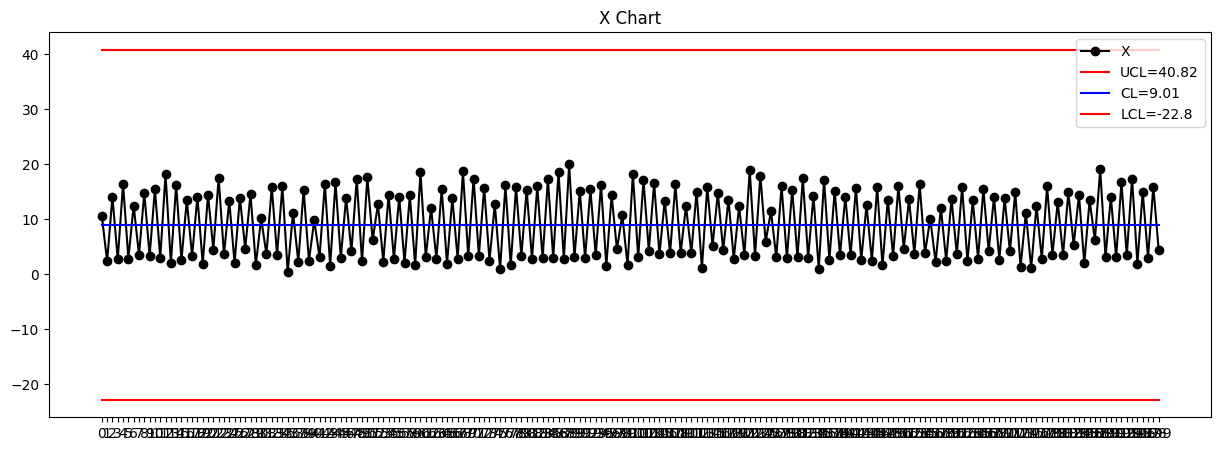

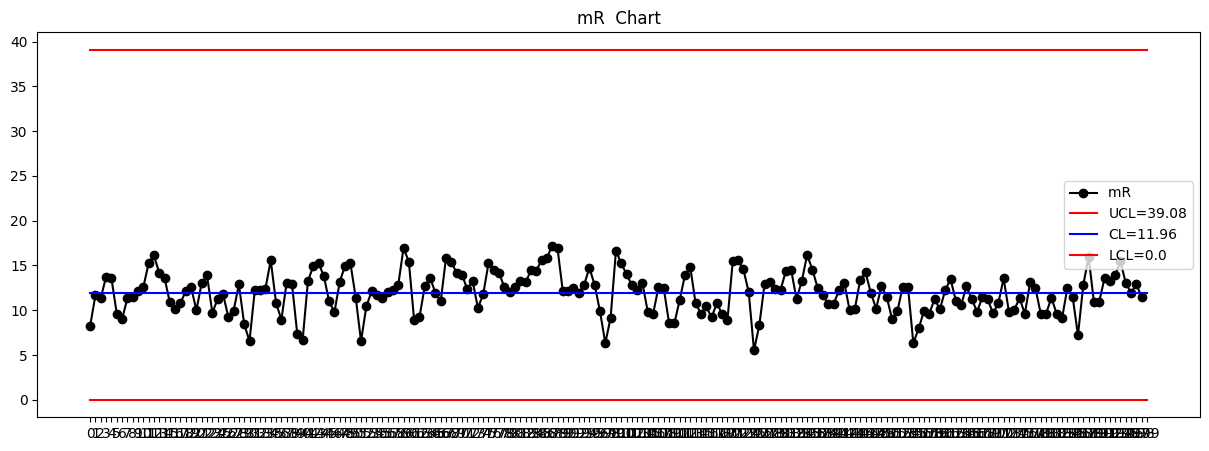

In [245]:
# This chart is for either Phase I or Phase II assuming all mean and sigma are estimated
# In this block, only Phase I data is plotted
# EWMA chart parameters are lamda and L
chart = MR_ControlChart()
chart.fit(data=x1, point=x1)
chart.ControlChart(d2 = 1.128,D3 = 0 ,D4 = 3.267)

Phase II 

In [435]:
dataPhaseIIarr =[dataPhaseII[['y1','y2']]]
dataPhaseIIarr

[         y1       y2
 0   19.0070  3.06248
 1   15.8642  1.42643
 2   18.5584  3.31967
 3   18.4586  2.42027
 4   15.1805  4.08682
 5   13.9162  2.15600
 6   21.2035  2.78811
 7   18.7396  3.45371
 8   14.6630  2.47455
 9   21.5389  2.93380
 10  14.9999  2.07993
 11  20.4689  4.06909
 12  18.4451  2.22109
 13  18.3939  3.25598
 14  21.1440  3.59908
 15  19.8316  3.41307
 16  18.9773  3.29723
 17  22.0645  2.30240
 18  19.2230  2.64564
 19  17.5390  2.50492
 20  21.8183  2.68581
 21  15.9978  2.52301
 22  19.4199  2.27729
 23  17.1247  3.66273
 24  18.8920  3.32500
 25  17.7501  3.26845
 26  15.9827  4.11585
 27  16.0378  3.37163
 28  19.5195  3.68337
 29  19.2262  1.15818
 30  15.5464  2.82252
 31  18.2574  2.91340
 32  16.3183  1.36028
 33  14.9400  3.11747
 34  19.2868  3.15074
 35  16.4086  1.21549
 36  17.0502  2.83501
 37  20.4672  5.48203
 38  18.4197  1.45871
 39  16.8850  1.71677
 40  15.5503  3.09539
 41  18.9409  2.96083
 42  21.5134  3.01760
 43  18.0643  1.73488
 44  20.86

In [438]:
# np flattern() function is used to convert a 2D matrix into 1D vector
# n=1 is use for EWMA chart
xp21=xp2.flatten()

In [439]:
# process mean is computed assuming it is stationary
xp21.mean()

10.4498309

In [442]:
# Define list variable for groups means
xp2_bar = []

# Define list variable for groups standard deviation
sp2 = []

In [443]:
# Get and append groups means and ranges
# if you run this cell multiple times, then the data series will be repeated
# since append is used here, if this block of codes is executed twice, m is doubled
for group in xp2:
    xp2_bar.append(group.mean())
    sp2.append(np.std(group))

m2=len(xp2_bar)
print('points in plotting dataset, ', m2)

points in plotting dataset,  50


In [444]:
# use the phase I data to compute mean and sigma
# S-bar is used here but you can also use R-bar or MR for sigma estimate
#c4 is 0.7979 for n=1
c4=0.7979
xp2_bar_bar=statistics.mean(xp2_bar)
sp2_bar=statistics.mean(sp2)
sigmap2_hat=sp2_bar/c4
print('process mean is, ', xp2_bar_bar)
print('process standard deviation is, ', sigmap2_hat)

process mean is,  10.4498309
process standard deviation is,  9.55486790324602


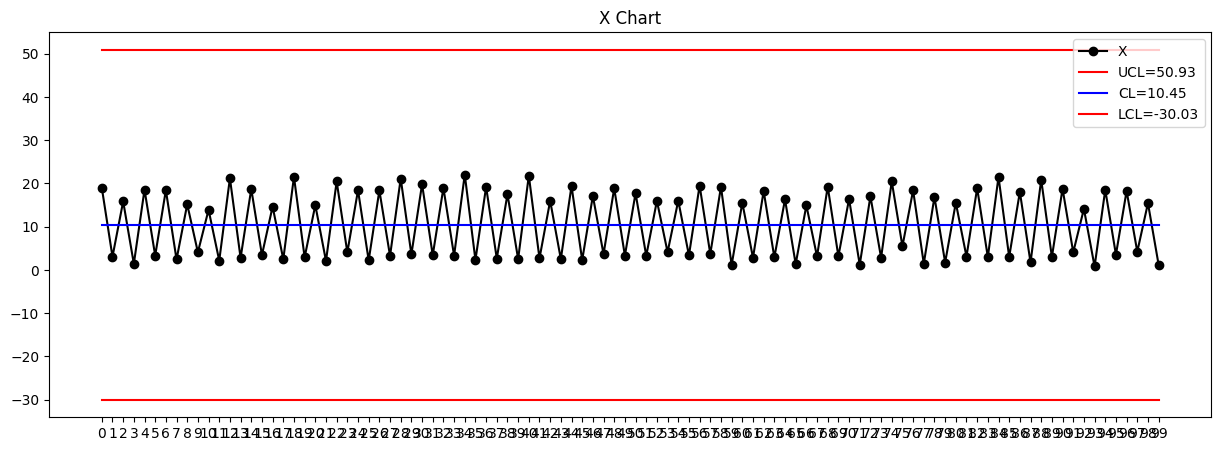

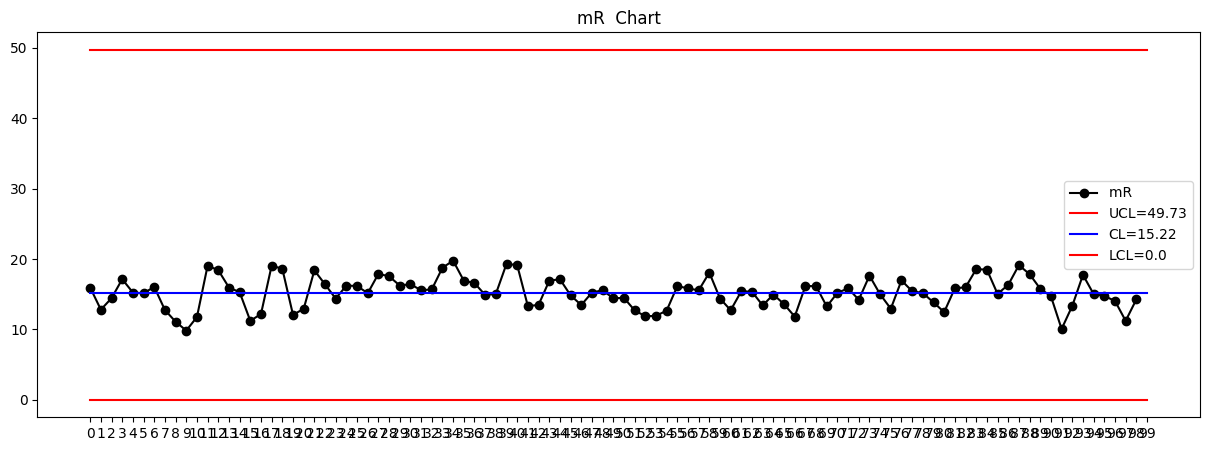

In [445]:
# This chart is for either Phase I or Phase II assuming all mean and sigma are estimated
# In this block, only Phase I data is plotted
# EWMA chart parameters are lamda and L
chart = MR_ControlChart()
chart.fit(data=xp21, point=xp21)
chart.ControlChart(d2 = 1.128,D3 = 0 ,D4 = 3.267)

Now we will use the mean and sigma estimated from the Phase I process above and plot all data

In [436]:
# this np.reshape convert the list dataI into the proper subgroup and m=30
# sample size n=5 is used for X-bar and R or X-bar and S chart
xp2=np.reshape(dataPhaseIIarr, (50,2))
xp2

array([[19.007  ,  3.06248],
       [15.8642 ,  1.42643],
       [18.5584 ,  3.31967],
       [18.4586 ,  2.42027],
       [15.1805 ,  4.08682],
       [13.9162 ,  2.156  ],
       [21.2035 ,  2.78811],
       [18.7396 ,  3.45371],
       [14.663  ,  2.47455],
       [21.5389 ,  2.9338 ],
       [14.9999 ,  2.07993],
       [20.4689 ,  4.06909],
       [18.4451 ,  2.22109],
       [18.3939 ,  3.25598],
       [21.144  ,  3.59908],
       [19.8316 ,  3.41307],
       [18.9773 ,  3.29723],
       [22.0645 ,  2.3024 ],
       [19.223  ,  2.64564],
       [17.539  ,  2.50492],
       [21.8183 ,  2.68581],
       [15.9978 ,  2.52301],
       [19.4199 ,  2.27729],
       [17.1247 ,  3.66273],
       [18.892  ,  3.325  ],
       [17.7501 ,  3.26845],
       [15.9827 ,  4.11585],
       [16.0378 ,  3.37163],
       [19.5195 ,  3.68337],
       [19.2262 ,  1.15818],
       [15.5464 ,  2.82252],
       [18.2574 ,  2.9134 ],
       [16.3183 ,  1.36028],
       [14.94   ,  3.11747],
       [19.286

In [246]:
dataAllarr =[dataAll[['y1','y2']]]
dataAllarr

[          y1       y2
 0    10.6424  2.36723
 1    14.0940  2.70679
 2    16.4463  2.86357
 3    12.4810  3.49823
 4    14.8288  3.38062
 ..       ...      ...
 145  18.7887  4.08248
 146  14.1405  0.80146
 147  18.5453  3.52659
 148  18.2708  4.22568
 149  15.4418  1.18849
 
 [150 rows x 2 columns]]

In [247]:
# this np.reshape convert the list dataI into the proper subgroup and m=30
# sample size n=5 is used for X-bar and R or X-bar and S chart
x2=np.reshape(dataAllarr, (150,2))
x2

array([[10.6424 ,  2.36723],
       [14.094  ,  2.70679],
       [16.4463 ,  2.86357],
       [12.481  ,  3.49823],
       [14.8288 ,  3.38062],
       [15.4986 ,  2.94089],
       [18.1712 ,  2.05572],
       [16.2308 ,  2.61631],
       [13.4792 ,  3.36159],
       [14.117  ,  1.9361 ],
       [14.4749 ,  4.46486],
       [17.4969 ,  3.61496],
       [13.3352 ,  2.09649],
       [13.949  ,  4.68546],
       [14.6177 ,  1.72947],
       [10.1771 ,  3.62369],
       [15.8735 ,  3.5925 ],
       [16.0014 ,  0.42532],
       [11.2366 ,  2.2918 ],
       [15.3799 ,  2.47218],
       [ 9.8013 ,  3.16742],
       [16.4225 ,  1.50788],
       [16.7719 ,  2.97379],
       [13.9469 ,  4.15259],
       [17.3446 ,  2.36699],
       [17.6218 ,  6.20852],
       [12.7403 ,  2.30741],
       [14.4338 ,  2.77957],
       [14.1232 ,  2.12323],
       [14.4082 ,  1.62192],
       [18.5641 ,  3.13863],
       [12.0441 ,  2.84845],
       [15.5157 ,  1.89346],
       [13.8452 ,  2.86982],
       [18.702

In [248]:
# np flattern() function is used to convert a 2D matrix into 1D vector
# n=1 is use for EWMA chart
x2=x2.flatten()

In [249]:
# this np.reshape convert the list dataI into the proper subgroup and m=45
x3=np.reshape(dataAll, (150,2))
# Define list variable for groups means
x_bar2 = []

# Define list variable for groups ranges
s2 = [] 

# Get and append groups means and ranges
# if you run this cell multiple times, then the data series will be repeated
for group in x2:
    x_bar2.append(group.mean())
    s2.append(np.std(group))

m=len(x_bar2)
print('points in x, ', m)

points in x,  300


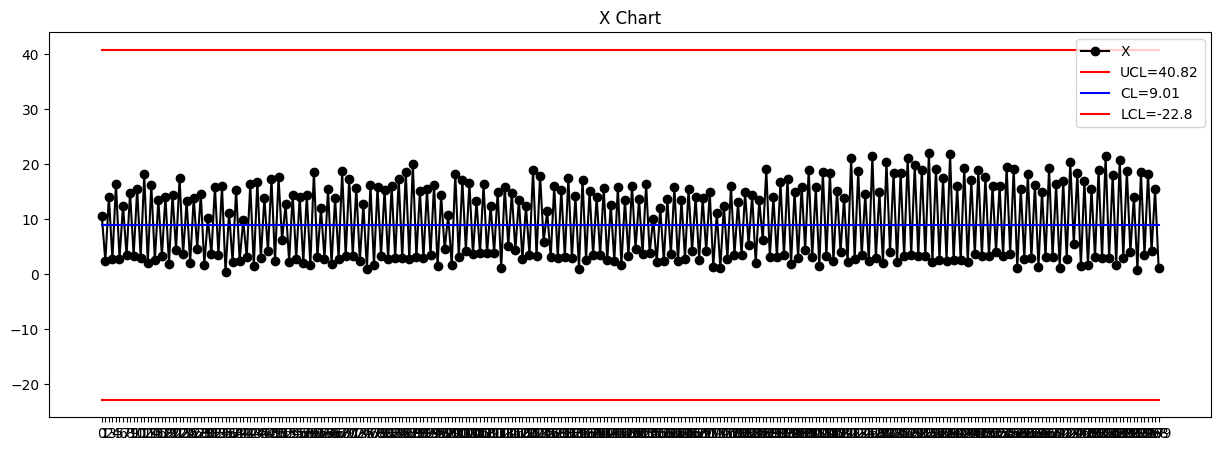

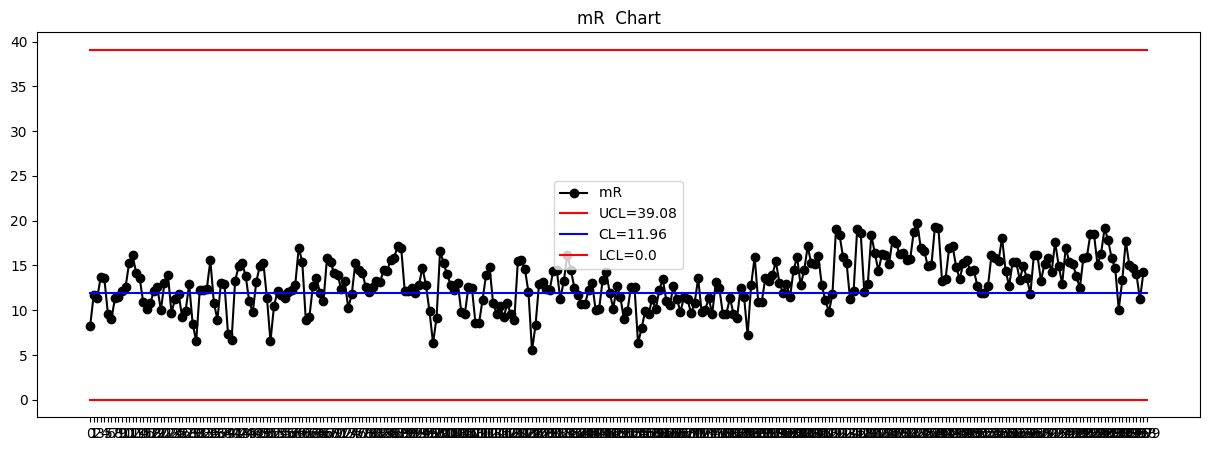

In [250]:
# This chart is for both Phase I or Phase II assuming all mean and sigma are estimated in Phase I
# IX MR chart parameters are lamda and L
chart = MR_ControlChart()
chart.fit(data=x1, point=x2)
chart.ControlChart(d2 = 1.128,D3 = 0 ,D4 = 3.267)

Note that the UCL of the IX chart is the same for both the Phase I and II charts. The IX chart in Phase II does not show out of control. The IX chart is not very sensitive for detecting small shifts.

# d.	

(5 points) Design a CUSUM chart for mean detection on y1. Make sure the designs of both charts have the in-control ARL at 370 and the 0.5 sigma shift is the most important factor. Again use the first 100 observations for Phase 1 and the last 50 for Phase 2. Report all control limits and draw conclusions about the y1 process. 



**Solution part d: BOTTOMLINE: The UCL is 35.63.In conclusion from the below analysis, Y1 process has no upward or downward trends in the upper and lower CUSUMs. The plotted points fluctuate randomly around zero. If an upward or downward trend develops, the process mean has shifted and the process may be affected by special causes, which is not the case for this dataset. ** **bold text**

35.63

The designs of both charts have the in-control ARL at 370 and the 0.5 sigma shift is the most important factor, therfore k =0.5 and h=4.77 for ARL_0 = 370. The UCL is 35.63. CUSUM charts improve the ability to detect small shifts (i.e. less than 1.5σ) by charting a statistic that incorporates current and previous data values from the process. In conclusion from the below analysis, Y1 process has no upward or downward trends in the upper and lower CUSUMs. The plotted points fluctuate randomly around zero. If an upward or downward trend develops, the process mean has shifted and the process may be affected by special causes, which is not the case for this dataset.  

In [320]:
# Import required libraries
import numpy as np
import statistics
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
import pandas as pd
plt.style.use('seaborn-colorblind')

<ipython-input-320-8b1c20966cd4>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-colorblind')


In [321]:
from pandas.io.formats.info import DataFrameInfoPrinter
# to read in the data make sure that you use the raw format in Github
# the following input statement is needed to use pandas dataframe feature
import pandas as pd
dataAll = pd.read_csv('https://raw.githubusercontent.com/anfansler/IMSE641/main/Midterm2-data.txt', sep='\t',na_values='.')

dataPhaseI = pd.read_csv('https://raw.githubusercontent.com/anfansler/IMSE641/main/Midterm2-data-PhaseI.csv', sep=',',na_values='.')
dataPhaseII = pd.read_csv('https://raw.githubusercontent.com/anfansler/IMSE641/main/Midterm2-data-PhaseII.csv', sep=',',na_values='.')

dataPhaseIy1 = pd.read_csv('https://raw.githubusercontent.com/anfansler/IMSE641/main/Midterm2-data-PhaseI-y1.csv', sep=',',na_values='.')
dataPhaseIy2 = pd.read_csv('https://raw.githubusercontent.com/anfansler/IMSE641/main/Midterm2-data-PhaseI-y2.csv', sep=',',na_values='.')
dataPhaseIIy1 = pd.read_csv('https://raw.githubusercontent.com/anfansler/IMSE641/main/Midterm2-data-PhaseII-y1.csv', sep=',',na_values='.')
dataPhaseIIy2 = pd.read_csv('https://raw.githubusercontent.com/anfansler/IMSE641/main/Midterm2-data-PhaseII-y2.csv', sep=',',na_values='.')

dataPhaseIarr =[dataPhaseI[['y1','y2']]]
dataPhaseIarr

[         y1       y2
 0   10.6424  2.36723
 1   14.0940  2.70679
 2   16.4463  2.86357
 3   12.4810  3.49823
 4   14.8288  3.38062
 ..      ...      ...
 95  14.0691  3.12741
 96  16.6952  3.45019
 97  17.4013  1.95613
 98  15.0023  3.05843
 99  15.9530  4.51147
 
 [100 rows x 2 columns]]

In [322]:
# this np.reshape convert the list dataI into the proper subgroup and m=30
# sample size n=5 is used for X-bar and R or X-bar and S chart
x=np.reshape(dataPhaseIarr, (100,2))
x

array([[10.6424 ,  2.36723],
       [14.094  ,  2.70679],
       [16.4463 ,  2.86357],
       [12.481  ,  3.49823],
       [14.8288 ,  3.38062],
       [15.4986 ,  2.94089],
       [18.1712 ,  2.05572],
       [16.2308 ,  2.61631],
       [13.4792 ,  3.36159],
       [14.117  ,  1.9361 ],
       [14.4749 ,  4.46486],
       [17.4969 ,  3.61496],
       [13.3352 ,  2.09649],
       [13.949  ,  4.68546],
       [14.6177 ,  1.72947],
       [10.1771 ,  3.62369],
       [15.8735 ,  3.5925 ],
       [16.0014 ,  0.42532],
       [11.2366 ,  2.2918 ],
       [15.3799 ,  2.47218],
       [ 9.8013 ,  3.16742],
       [16.4225 ,  1.50788],
       [16.7719 ,  2.97379],
       [13.9469 ,  4.15259],
       [17.3446 ,  2.36699],
       [17.6218 ,  6.20852],
       [12.7403 ,  2.30741],
       [14.4338 ,  2.77957],
       [14.1232 ,  2.12323],
       [14.4082 ,  1.62192],
       [18.5641 ,  3.13863],
       [12.0441 ,  2.84845],
       [15.5157 ,  1.89346],
       [13.8452 ,  2.86982],
       [18.702

In [323]:
# np flattern() function is used to convert a 2D matrix into 1D vector
# n=1 is use for CUSUM chart
x1=x.flatten()

In [324]:
# process mean is computed assuming it is stationary
x1.mean()

9.008399899999999

In [325]:
# this class define how tabular CUSUM chart is plotted
# input: h, k, process mean mu & process standard deviation sigma & delta
# h is unit away from the center line; H=h * sigma
# k is delta/2; K= k * sigma
# delta is the mu1 - mu0, the shift magnitude to be detected
# reference K= (delta/2)*sigma
class CUSUM:
    def fit(self,data, h, k, mu, sigma):
        
        self.X     = data
        self.cplus     = np.zeros(len(data))
        self.cminus     = np.zeros(len(data))
        self.H = h * sigma
        self.K = k * sigma
        self.mean  = mu
        self.sigma = sigma
        self.cplus[0]  = 0
        self.cminus[0] = 0
        for i in range(1,len(self.X)):
            self.cplus[i] = max(0, self.X[i] -(self.mean+self.K) + self.cplus[i-1]) 
            self.cminus[i] = max(0, (self.mean-self.K) - self.X[i] + self.cminus[i-1])

    def  ControlChart(self):
        # all CUSUM parameters will be imported from def fit
        ucl = np.zeros(len(self.X))
        lcl = np.zeros(len(self.X))
        # I   = np.arange(1,len(self.X)+1)
        
        for i in range(len(self.X)):
            ucl[i] = self.H
            lcl[i] = -1*self.H
              
        plt.figure(figsize=(15,5))
        plt.plot(self.cplus,marker="o",color="k",label="$C+$")
        plt.plot(-1*self.cminus,marker="x",color="k",label="$C-$")
        plt.plot(np.zeros(len(self.X)),color="k",alpha=0.35)
        plt.plot(ucl,color="r",label="UCL {}".format(ucl[len(ucl)-1].round(2)))
        plt.plot(lcl,color="r",label="LCL {}".format(lcl[len(lcl)-1].round(2)))
        plt.title("CUSUM Control Chart")
        plt.legend(loc="upper left")
        plt.show()

In [326]:
# Define list variable for groups means
x_bar = []

# Define list variable for groups standard deviation
s = []

In [327]:
# Get and append groups means and ranges
# if you run this cell multiple times, then the data series will be repeated
# since append is used here, if this block of codes is executed twice, m is doubled
for group in x:
    x_bar.append(group.mean())
    s.append(np.std(group))

m=len(x_bar)
print('points in plotting dataset, ', m)

points in plotting dataset,  100


In [328]:
# use the phase I data to compute mean and sigma
# S-bar is used here but you can also use R-bar or MR for sigma estimate
#c4 is 0.7979 for n=1
c4=0.7979
x_bar_bar=statistics.mean(x_bar)
s_bar=statistics.mean(s)
sigma_hat=s_bar/c4
print('process mean is, ', x_bar_bar)
print('process standard deviation is, ', sigma_hat)

process mean is,  9.0083999
process standard deviation is,  7.477107532272214


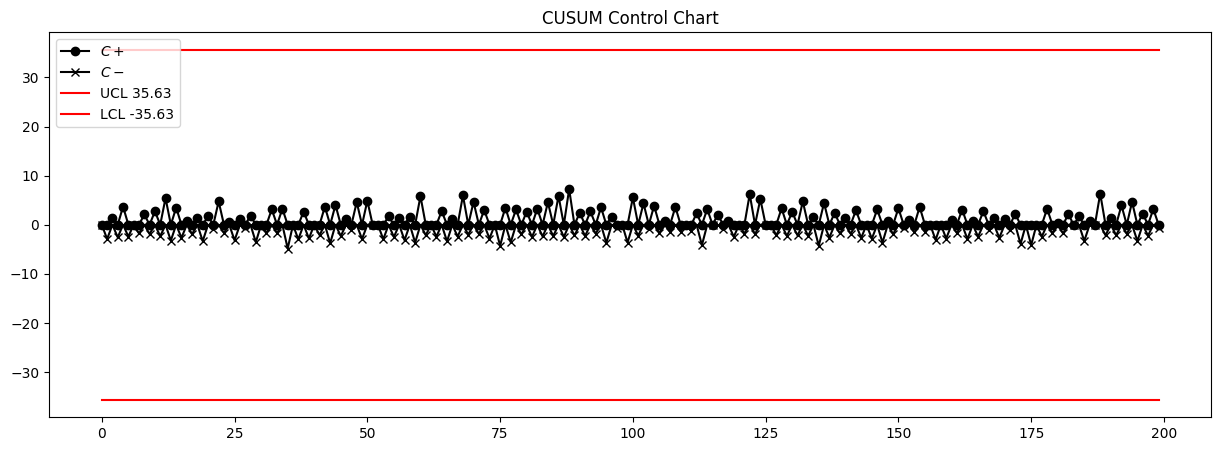

In [329]:
# This chart is for either Phase I or Phase II assuming all mean and sigma are estimated
# In this block, only Phase I data is plotted
# CUSUM chart parameters are K, mu, sigma
# if mu and sigma are known or can be estimated, the above estimations using x-bar and S are not necessary
chart = CUSUM()
chart.fit(data=x1, h=4.77 , k=0.5, mu=9, sigma=7.47)
chart.ControlChart()

Phase II

In [446]:
dataPhaseIIarr =[dataPhaseII[['y1','y2']]]
dataPhaseIIarr

[         y1       y2
 0   19.0070  3.06248
 1   15.8642  1.42643
 2   18.5584  3.31967
 3   18.4586  2.42027
 4   15.1805  4.08682
 5   13.9162  2.15600
 6   21.2035  2.78811
 7   18.7396  3.45371
 8   14.6630  2.47455
 9   21.5389  2.93380
 10  14.9999  2.07993
 11  20.4689  4.06909
 12  18.4451  2.22109
 13  18.3939  3.25598
 14  21.1440  3.59908
 15  19.8316  3.41307
 16  18.9773  3.29723
 17  22.0645  2.30240
 18  19.2230  2.64564
 19  17.5390  2.50492
 20  21.8183  2.68581
 21  15.9978  2.52301
 22  19.4199  2.27729
 23  17.1247  3.66273
 24  18.8920  3.32500
 25  17.7501  3.26845
 26  15.9827  4.11585
 27  16.0378  3.37163
 28  19.5195  3.68337
 29  19.2262  1.15818
 30  15.5464  2.82252
 31  18.2574  2.91340
 32  16.3183  1.36028
 33  14.9400  3.11747
 34  19.2868  3.15074
 35  16.4086  1.21549
 36  17.0502  2.83501
 37  20.4672  5.48203
 38  18.4197  1.45871
 39  16.8850  1.71677
 40  15.5503  3.09539
 41  18.9409  2.96083
 42  21.5134  3.01760
 43  18.0643  1.73488
 44  20.86

In [448]:
# np flattern() function is used to convert a 2D matrix into 1D vector
# n=1 is use for CUSUM chart
xp21=xp2.flatten()

In [449]:
# process mean is computed assuming it is stationary
xp21.mean()

10.4498309

In [450]:
# Define list variable for groups means
xp2_bar = []

# Define list variable for groups standard deviation
sp2 = []

In [451]:
# Get and append groups means and ranges
# if you run this cell multiple times, then the data series will be repeated
# since append is used here, if this block of codes is executed twice, m is doubled
for group in xp2:
    xp2_bar.append(group.mean())
    sp2.append(np.std(group))

m2=len(xp2_bar)
print('points in plotting dataset, ', m2)

points in plotting dataset,  50


In [452]:
# use the phase I data to compute mean and sigma
# S-bar is used here but you can also use R-bar or MR for sigma estimate
#c4 is 0.7979 for n=1
c4=0.7979
xp2_bar_bar=statistics.mean(xp2_bar)
sp2_bar=statistics.mean(sp2)
sigmap2_hat=sp2_bar/c4
print('process mean is, ', xp2_bar_bar)
print('process standard deviation is, ', sigmap2_hat)

process mean is,  10.4498309
process standard deviation is,  9.55486790324602


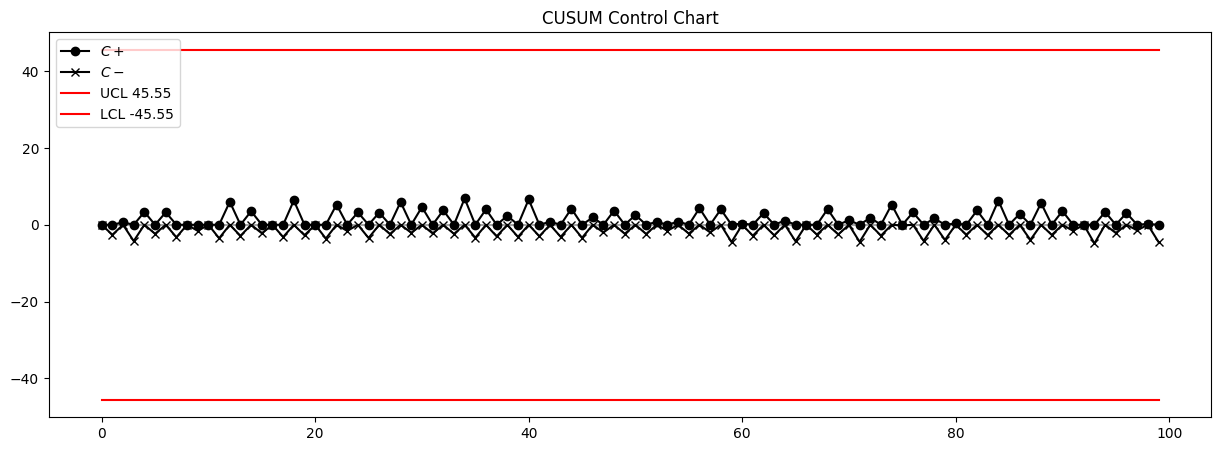

In [454]:
# This chart is for either Phase I or Phase II assuming all mean and sigma are estimated
# In this block, only Phase I data is plotted
# CUSUM chart parameters are K, mu, sigma
# if mu and sigma are known or can be estimated, the above estimations using x-bar and S are not necessary
chart = CUSUM()
chart.fit(data=xp21, h=4.77 , k=0.5, mu=10.44, sigma=9.55)
chart.ControlChart()

Now we will use the mean and sigma estimated from the Phase I process above and plot all data

In [447]:
# this np.reshape convert the list dataI into the proper subgroup and m=30
# sample size n=5 is used for X-bar and R or X-bar and S chart
xp2=np.reshape(dataPhaseIIarr, (50,2))
xp2

array([[19.007  ,  3.06248],
       [15.8642 ,  1.42643],
       [18.5584 ,  3.31967],
       [18.4586 ,  2.42027],
       [15.1805 ,  4.08682],
       [13.9162 ,  2.156  ],
       [21.2035 ,  2.78811],
       [18.7396 ,  3.45371],
       [14.663  ,  2.47455],
       [21.5389 ,  2.9338 ],
       [14.9999 ,  2.07993],
       [20.4689 ,  4.06909],
       [18.4451 ,  2.22109],
       [18.3939 ,  3.25598],
       [21.144  ,  3.59908],
       [19.8316 ,  3.41307],
       [18.9773 ,  3.29723],
       [22.0645 ,  2.3024 ],
       [19.223  ,  2.64564],
       [17.539  ,  2.50492],
       [21.8183 ,  2.68581],
       [15.9978 ,  2.52301],
       [19.4199 ,  2.27729],
       [17.1247 ,  3.66273],
       [18.892  ,  3.325  ],
       [17.7501 ,  3.26845],
       [15.9827 ,  4.11585],
       [16.0378 ,  3.37163],
       [19.5195 ,  3.68337],
       [19.2262 ,  1.15818],
       [15.5464 ,  2.82252],
       [18.2574 ,  2.9134 ],
       [16.3183 ,  1.36028],
       [14.94   ,  3.11747],
       [19.286

In [330]:
dataAllarr =[dataAll[['y1','y2']]]
dataAllarr

[          y1       y2
 0    10.6424  2.36723
 1    14.0940  2.70679
 2    16.4463  2.86357
 3    12.4810  3.49823
 4    14.8288  3.38062
 ..       ...      ...
 145  18.7887  4.08248
 146  14.1405  0.80146
 147  18.5453  3.52659
 148  18.2708  4.22568
 149  15.4418  1.18849
 
 [150 rows x 2 columns]]

In [331]:
# this np.reshape convert the list dataI into the proper subgroup and m=30
# sample size n=5 is used for X-bar and R or X-bar and S chart
x2=np.reshape(dataAllarr, (150,2))
x2

array([[10.6424 ,  2.36723],
       [14.094  ,  2.70679],
       [16.4463 ,  2.86357],
       [12.481  ,  3.49823],
       [14.8288 ,  3.38062],
       [15.4986 ,  2.94089],
       [18.1712 ,  2.05572],
       [16.2308 ,  2.61631],
       [13.4792 ,  3.36159],
       [14.117  ,  1.9361 ],
       [14.4749 ,  4.46486],
       [17.4969 ,  3.61496],
       [13.3352 ,  2.09649],
       [13.949  ,  4.68546],
       [14.6177 ,  1.72947],
       [10.1771 ,  3.62369],
       [15.8735 ,  3.5925 ],
       [16.0014 ,  0.42532],
       [11.2366 ,  2.2918 ],
       [15.3799 ,  2.47218],
       [ 9.8013 ,  3.16742],
       [16.4225 ,  1.50788],
       [16.7719 ,  2.97379],
       [13.9469 ,  4.15259],
       [17.3446 ,  2.36699],
       [17.6218 ,  6.20852],
       [12.7403 ,  2.30741],
       [14.4338 ,  2.77957],
       [14.1232 ,  2.12323],
       [14.4082 ,  1.62192],
       [18.5641 ,  3.13863],
       [12.0441 ,  2.84845],
       [15.5157 ,  1.89346],
       [13.8452 ,  2.86982],
       [18.702

In [332]:
# np flattern() function is used to convert a 2D matrix into 1D vector
# n=1 is use for EWMA chart
x2=x2.flatten()

In [333]:
# this np.reshape convert the list dataI into the proper subgroup and m=45
x3=np.reshape(dataAllarr, (150,2))
# Define list variable for groups means
x_bar2 = []

# Define list variable for groups ranges
s2 = [] 

# Get and append groups means and ranges
# if you run this cell multiple times, then the data series will be repeated
for group in x2:
    x_bar2.append(group.mean())
    s2.append(np.std(group))

m=len(x_bar2)
print('points in x, ', m)

points in x,  300


In [334]:
# use the phase I data to compute mean and sigma
# S-bar is used here but you can also use R-bar or MR for sigma estimate
#c4 is 0.7979 for n=1
c4=0.7979
x_bar_bar=statistics.mean(x_bar)
s_bar=statistics.mean(s)
sigma_hat=s_bar/c4
print('process mean is, ', x_bar_bar)
print('process standard deviation is, ', sigma_hat)

process mean is,  9.0083999
process standard deviation is,  7.477107532272214


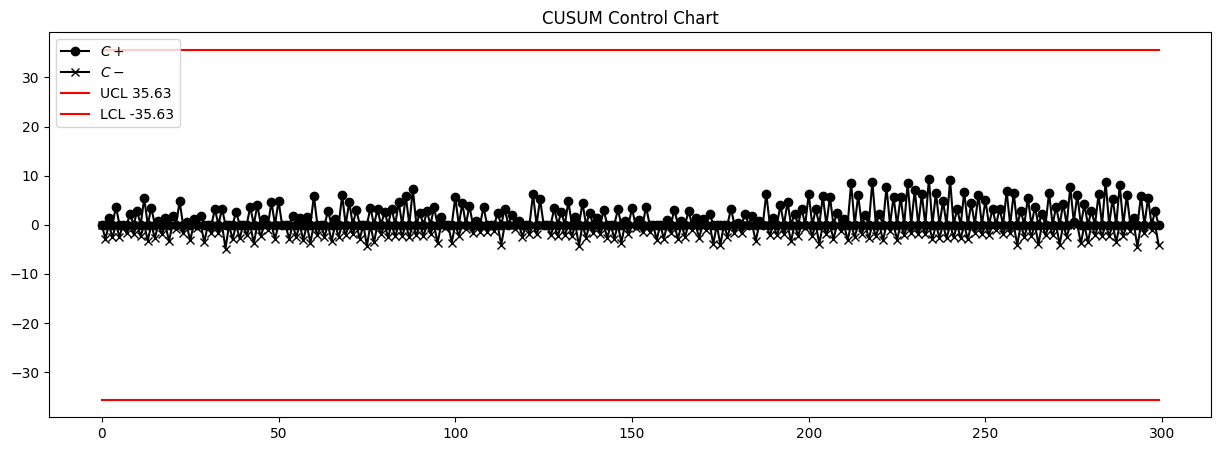

In [335]:
# This chart is for both Phase I or Phase II assuming all mean and sigma are estimated in Phase I
# CUSUM chart parameters are h & k assuming mu and sigma are known
chart = CUSUM()
chart.fit(data=x2, h=4.77 , k=0.5, mu=9, sigma=7.47)
chart.ControlChart()

# e.	

(5 points) Design an EWMA chart for mean detection on y1. Make sure the designs of both charts have the in-control ARL at 370 and the 0.5 sigma shift is the most important factor. Again use the first 100 observations for Phase 1 and the last 50 for Phase 2. Report all control limits and draw conclusions about the y1 process. 


**Solution part e: BOTTOMLINE: Based on the EWMA chart, the UCL is 11.99 and the LCL is 6.01 and the process is in control. **bold text**

The Exponentially Weighted Moving Average (EWMA) is a statistic for monitoring the process that averages the data in a way that gives less and less weight to data as they are further removed in time. The design parameters of the chart are L and lamda. The parameters can be chosen to give desired ARL performance, which for this is ARL = 370 so we use lamda = 0.05 and L = 2.5. Similar to the CUSUM, the EWMA performs well against small shifts but does not react to large shifts as quickly as the Shewhart chart. EWMA is often superior to the CUSUM for larger shifts particularly if lamda > 0.1. For this always look at range chart first. The control limits on the EWMA chart are derived from the average Range (or Moving Range, if n=1), so if the Range chart is out of control, then the control limits on the EWMA chart are meaningless. On the Range chart, look for out of control points.

In [336]:
# Import required libraries
import numpy as np
import statistics
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
import pandas as pd
plt.style.use('seaborn-colorblind')

<ipython-input-336-8b1c20966cd4>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-colorblind')


In [337]:
from pandas.io.formats.info import DataFrameInfoPrinter
# to read in the data make sure that you use the raw format in Github
# the following input statement is needed to use pandas dataframe feature
import pandas as pd
dataAll = pd.read_csv('https://raw.githubusercontent.com/anfansler/IMSE641/main/Midterm2-data.txt', sep='\t',na_values='.')

dataPhaseI = pd.read_csv('https://raw.githubusercontent.com/anfansler/IMSE641/main/Midterm2-data-PhaseI.csv', sep=',',na_values='.')
dataPhaseII = pd.read_csv('https://raw.githubusercontent.com/anfansler/IMSE641/main/Midterm2-data-PhaseII.csv', sep=',',na_values='.')

dataPhaseIy1 = pd.read_csv('https://raw.githubusercontent.com/anfansler/IMSE641/main/Midterm2-data-PhaseI-y1.csv', sep=',',na_values='.')
dataPhaseIy2 = pd.read_csv('https://raw.githubusercontent.com/anfansler/IMSE641/main/Midterm2-data-PhaseI-y2.csv', sep=',',na_values='.')
dataPhaseIIy1 = pd.read_csv('https://raw.githubusercontent.com/anfansler/IMSE641/main/Midterm2-data-PhaseII-y1.csv', sep=',',na_values='.')
dataPhaseIIy2 = pd.read_csv('https://raw.githubusercontent.com/anfansler/IMSE641/main/Midterm2-data-PhaseII-y2.csv', sep=',',na_values='.')

dataPhaseIarr =[dataPhaseI[['y1','y2']]]
dataPhaseIarr

[         y1       y2
 0   10.6424  2.36723
 1   14.0940  2.70679
 2   16.4463  2.86357
 3   12.4810  3.49823
 4   14.8288  3.38062
 ..      ...      ...
 95  14.0691  3.12741
 96  16.6952  3.45019
 97  17.4013  1.95613
 98  15.0023  3.05843
 99  15.9530  4.51147
 
 [100 rows x 2 columns]]

In [338]:
# this np.reshape convert the list dataI into the proper subgroup and m=30
# sample size n=5 is used for X-bar and R or X-bar and S chart
x=np.reshape(dataPhaseIarr, (100,2))
x

array([[10.6424 ,  2.36723],
       [14.094  ,  2.70679],
       [16.4463 ,  2.86357],
       [12.481  ,  3.49823],
       [14.8288 ,  3.38062],
       [15.4986 ,  2.94089],
       [18.1712 ,  2.05572],
       [16.2308 ,  2.61631],
       [13.4792 ,  3.36159],
       [14.117  ,  1.9361 ],
       [14.4749 ,  4.46486],
       [17.4969 ,  3.61496],
       [13.3352 ,  2.09649],
       [13.949  ,  4.68546],
       [14.6177 ,  1.72947],
       [10.1771 ,  3.62369],
       [15.8735 ,  3.5925 ],
       [16.0014 ,  0.42532],
       [11.2366 ,  2.2918 ],
       [15.3799 ,  2.47218],
       [ 9.8013 ,  3.16742],
       [16.4225 ,  1.50788],
       [16.7719 ,  2.97379],
       [13.9469 ,  4.15259],
       [17.3446 ,  2.36699],
       [17.6218 ,  6.20852],
       [12.7403 ,  2.30741],
       [14.4338 ,  2.77957],
       [14.1232 ,  2.12323],
       [14.4082 ,  1.62192],
       [18.5641 ,  3.13863],
       [12.0441 ,  2.84845],
       [15.5157 ,  1.89346],
       [13.8452 ,  2.86982],
       [18.702

In [339]:
# np flattern() function is used to convert a 2D matrix into 1D vector
# n=1 is use for EWMA chart
x1=x.flatten()

In [340]:
# process mean is computed assuming it is stationary
x1.mean()

9.008399899999999

In [341]:
# this class define how EWMA chart is plotted
class EWMA:
    def fit(self,data,lamda,mean):
        
        self.X     = data
        self.z     = np.zeros(len(data))
        self.lamda = lamda
        self.mean  = mean
        self.z[0]  = self.mean
        for i in range(1,len(self.z)):
            self.z[i] = self.lamda*self.X[i] + (1-self.lamda)*self.z[i-1] 
 
    def  ControlChart(self,L,sigma):
        # L     : usually 3
        ucl = np.zeros(len(self.X))
        lcl = np.zeros(len(self.X))
        I   = np.arange(1,len(self.X)+1)
        
        for i in range(len(self.X)):
            ucl[i] = self.mean + L*sigma*np.sqrt((self.lamda / (2 - self.lamda))*(1-(1-self.lamda)**(I[i])))
            lcl[i] = self.mean - L*sigma*np.sqrt((self.lamda / (2 - self.lamda))*(1-(1-self.lamda)**(I[i])))
              
        plt.figure(figsize=(15,5))
        plt.plot(self.z,marker="o",color="k",label="$Z_i$")
        plt.plot([self.mean]*len(self.X),color="k",alpha=0.35)
        plt.plot(ucl,color="r",label="UCL {}".format(ucl[len(ucl)-1].round(2)))
        plt.plot(lcl,color="r",label="LCL {}".format(lcl[len(lcl)-1].round(2)))
        plt.title("EWMA Conrol Chart")
        plt.legend(loc="upper left")
        plt.show()
  

In [342]:
# Define list variable for groups means
x_bar = []

# Define list variable for groups standard deviation
s = []

In [343]:
# Get and append groups means and ranges
# if you run this cell multiple times, then the data series will be repeated
# since append is used here, if this block of codes is executed twice, m is doubled
for group in x:
    x_bar.append(group.mean())
    s.append(np.std(group))

m=len(x_bar)
print('points in plotting dataset, ', m)

points in plotting dataset,  100


In [344]:
# use the phase I data to compute mean and sigma
# S-bar is used here but you can also use R-bar or MR for sigma estimate
#c4 is 0.7979 for n=1
c4=0.7979
x_bar_bar=statistics.mean(x_bar)
s_bar=statistics.mean(s)
sigma_hat=s_bar/c4
print('process mean is, ', x_bar_bar)
print('process standard deviation is, ', sigma_hat)

process mean is,  9.0083999
process standard deviation is,  7.477107532272214


In [345]:
np.std(x3)

6.810768171673348

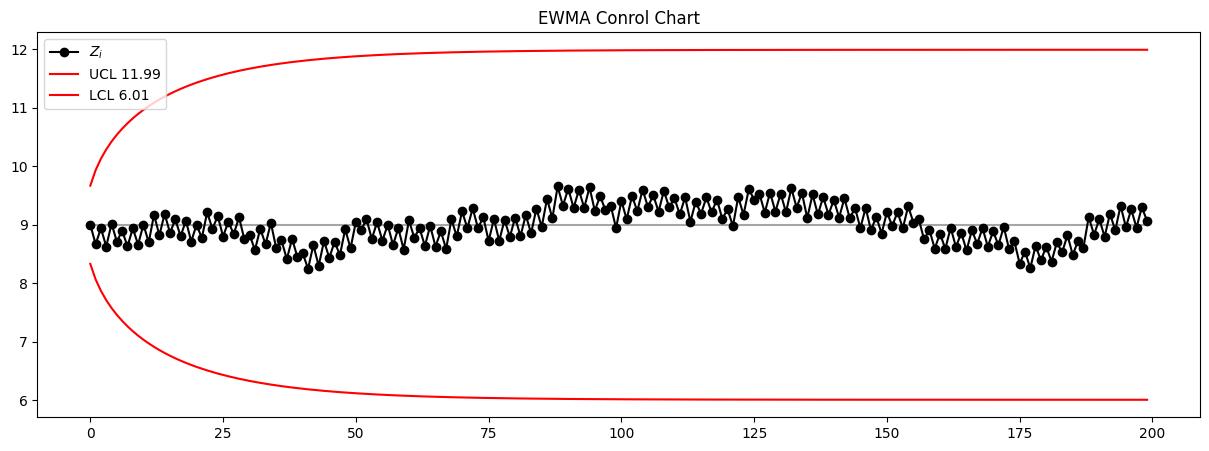

In [347]:
# This chart is for either Phase I or Phase II assuming all mean and sigma are estimated
# In this block, only Phase I data is plotted
# EWMA chart parameters are lamda and L
#for ARL = 370 and 0.5 sigma we have L = 2.5 and lamda = 0.05
chart = EWMA()
chart.fit(data=x1,lamda=0.05,mean=9)
chart.ControlChart(L=2.5,sigma=7.477)

Phase II

In [455]:
dataPhaseIIarr =[dataPhaseII[['y1','y2']]]
dataPhaseIIarr

[         y1       y2
 0   19.0070  3.06248
 1   15.8642  1.42643
 2   18.5584  3.31967
 3   18.4586  2.42027
 4   15.1805  4.08682
 5   13.9162  2.15600
 6   21.2035  2.78811
 7   18.7396  3.45371
 8   14.6630  2.47455
 9   21.5389  2.93380
 10  14.9999  2.07993
 11  20.4689  4.06909
 12  18.4451  2.22109
 13  18.3939  3.25598
 14  21.1440  3.59908
 15  19.8316  3.41307
 16  18.9773  3.29723
 17  22.0645  2.30240
 18  19.2230  2.64564
 19  17.5390  2.50492
 20  21.8183  2.68581
 21  15.9978  2.52301
 22  19.4199  2.27729
 23  17.1247  3.66273
 24  18.8920  3.32500
 25  17.7501  3.26845
 26  15.9827  4.11585
 27  16.0378  3.37163
 28  19.5195  3.68337
 29  19.2262  1.15818
 30  15.5464  2.82252
 31  18.2574  2.91340
 32  16.3183  1.36028
 33  14.9400  3.11747
 34  19.2868  3.15074
 35  16.4086  1.21549
 36  17.0502  2.83501
 37  20.4672  5.48203
 38  18.4197  1.45871
 39  16.8850  1.71677
 40  15.5503  3.09539
 41  18.9409  2.96083
 42  21.5134  3.01760
 43  18.0643  1.73488
 44  20.86

In [456]:
# this np.reshape convert the list dataI into the proper subgroup and m=30
# sample size n=5 is used for X-bar and R or X-bar and S chart
xp2=np.reshape(dataPhaseIIarr, (50,2))
xp2

array([[19.007  ,  3.06248],
       [15.8642 ,  1.42643],
       [18.5584 ,  3.31967],
       [18.4586 ,  2.42027],
       [15.1805 ,  4.08682],
       [13.9162 ,  2.156  ],
       [21.2035 ,  2.78811],
       [18.7396 ,  3.45371],
       [14.663  ,  2.47455],
       [21.5389 ,  2.9338 ],
       [14.9999 ,  2.07993],
       [20.4689 ,  4.06909],
       [18.4451 ,  2.22109],
       [18.3939 ,  3.25598],
       [21.144  ,  3.59908],
       [19.8316 ,  3.41307],
       [18.9773 ,  3.29723],
       [22.0645 ,  2.3024 ],
       [19.223  ,  2.64564],
       [17.539  ,  2.50492],
       [21.8183 ,  2.68581],
       [15.9978 ,  2.52301],
       [19.4199 ,  2.27729],
       [17.1247 ,  3.66273],
       [18.892  ,  3.325  ],
       [17.7501 ,  3.26845],
       [15.9827 ,  4.11585],
       [16.0378 ,  3.37163],
       [19.5195 ,  3.68337],
       [19.2262 ,  1.15818],
       [15.5464 ,  2.82252],
       [18.2574 ,  2.9134 ],
       [16.3183 ,  1.36028],
       [14.94   ,  3.11747],
       [19.286

In [457]:
# np flattern() function is used to convert a 2D matrix into 1D vector
# n=1 is use for EWMA chart
xp21=xp2.flatten()

In [458]:
# process mean is computed assuming it is stationary
xp21.mean()

10.4498309

In [459]:
# Define list variable for groups means
xp2_bar = []

# Define list variable for groups standard deviation
sp2 = []

In [460]:
# Get and append groups means and ranges
# if you run this cell multiple times, then the data series will be repeated
# since append is used here, if this block of codes is executed twice, m is doubled
for group in xp2:
    xp2_bar.append(group.mean())
    sp2.append(np.std(group))

m2=len(xp2_bar)
print('points in plotting dataset, ', m2)

points in plotting dataset,  50


In [461]:
# use the phase I data to compute mean and sigma
# S-bar is used here but you can also use R-bar or MR for sigma estimate
#c4 is 0.7979 for n=1
c4=0.7979
xp2_bar_bar=statistics.mean(xp2_bar)
sp2_bar=statistics.mean(sp2)
sigmap2_hat=sp2_bar/c4
print('process mean is, ', xp2_bar_bar)
print('process standard deviation is, ', sigmap2_hat)

process mean is,  10.4498309
process standard deviation is,  9.55486790324602


In [462]:
np.std(x3)

6.810768171673348

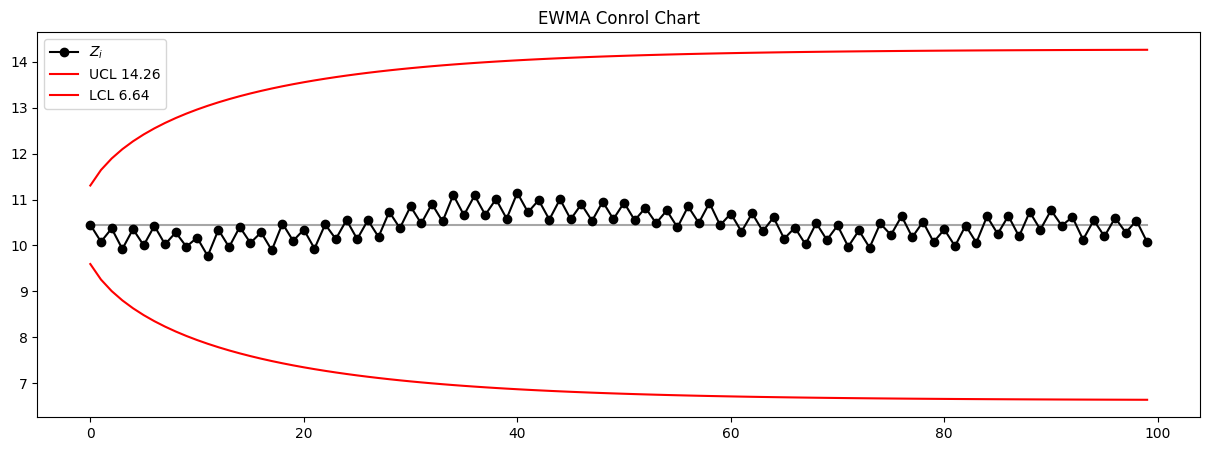

In [463]:
# This chart is for either Phase I or Phase II assuming all mean and sigma are estimated
# In this block, only Phase I data is plotted
# EWMA chart parameters are lamda and L
#for ARL = 370 and 0.5 sigma we have L = 2.5 and lamda = 0.05
chart = EWMA()
chart.fit(data=xp21,lamda=0.05,mean=10.45)
chart.ControlChart(L=2.5,sigma=9.55)

Now we will use the mean and sigma estimated from the Phase I process above and plot all data

In [348]:
dataAllarr =[dataAll[['y1','y2']]]
dataAllarr

[          y1       y2
 0    10.6424  2.36723
 1    14.0940  2.70679
 2    16.4463  2.86357
 3    12.4810  3.49823
 4    14.8288  3.38062
 ..       ...      ...
 145  18.7887  4.08248
 146  14.1405  0.80146
 147  18.5453  3.52659
 148  18.2708  4.22568
 149  15.4418  1.18849
 
 [150 rows x 2 columns]]

In [349]:
# this np.reshape convert the list dataI into the proper subgroup and m=30
# sample size n=5 is used for X-bar and R or X-bar and S chart
x2=np.reshape(dataAllarr, (150,2))
#x2

In [350]:
# np flattern() function is used to convert a 2D matrix into 1D vector
# n=1 is use for EWMA chart
x2=x2.flatten()

In [353]:
# this np.reshape convert the list dataI into the proper subgroup and m=45
x3=np.reshape(dataAllarr, (150,2))
# Define list variable for groups means
x_bar2 = []

# Define list variable for groups ranges
s2 = [] 

# Get and append groups means and ranges
# if you run this cell multiple times, then the data series will be repeated
for group in x2:
    x_bar2.append(group.mean())
    s2.append(np.std(group))

m=len(x_bar2)
print('points in x, ', m)

points in x,  300


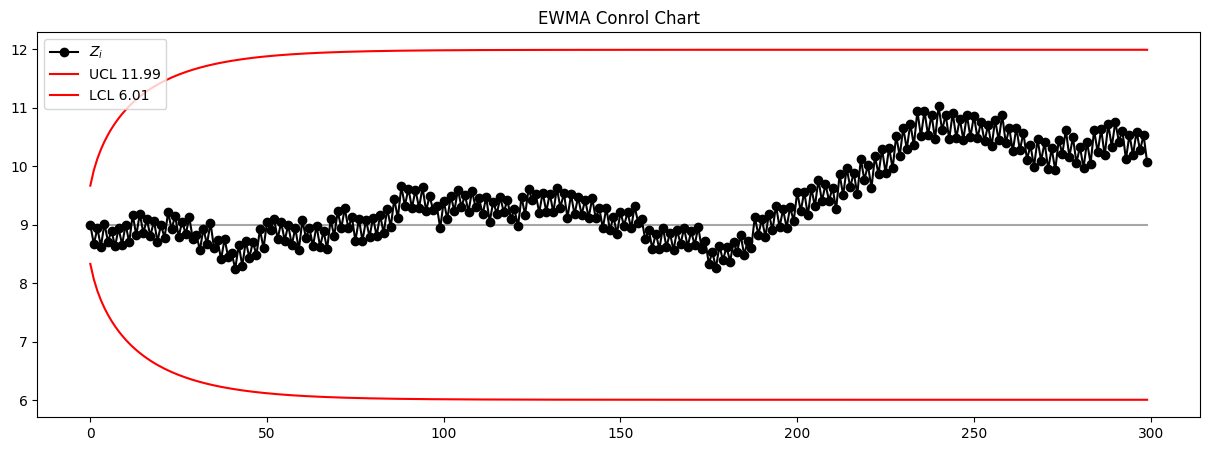

In [354]:
# This chart is for both Phase I or Phase II assuming all mean and sigma are estimated in Phase I
# EWMA chart parameters are lamda and L
chart = EWMA()
chart.fit(data=x2,lamda=0.05,mean=9)
chart.ControlChart(L=2.5,sigma=7.477)

# f.	

(5 points) Compute the covariance matrix of y1 and y2 using the first 100 observations. Report the covariance. Would you recommend the use of two sets of X-bar/R charts – one set on y1 and the other on y2 instead of one multivariate control chart? Explain.


**Solution part f: BOTTOMLINE: The covariance is of y1 and y2 using the first 100 observations is array([[4.6245344 , 0.31622662],
       [0.31622662, 1.18948543]]). The data could be correlated or dependent on one another so it is good to do a multivariate control chart. **bold text**

I would recommend the use of one set on y1 and the other on y2 instead of one multivariate control chart because when using a Multivariate EWMA (MEWMA) control chart, the chart is desing to show how correlated, or dependent, variables jointly affect a process or outcome. T2 control charts are to detect shifts in the mean of more than one interrelated variable. Both will give you the results you need from the charts to detect a small shift in the mean but the only difference is that the MEWMA may detect it slightly sooner than the T2. The data could be correlated or dependent on one another so it is good to do a multivariate control chart. These values in the covariance matrix show the distribution magnitude and direction of multivariate data in multidimensional space. By controlling these values we can have information about how data spread among two dimensions.


In [355]:
# Import required libraries
from scipy.stats import beta
from scipy.stats import f
from scipy.stats import multivariate_normal
import numpy as np
import statistics
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
import pandas as pd
plt.style.use('seaborn-colorblind')

<ipython-input-355-b19791e77700>:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-colorblind')


In [356]:
from pandas.io.formats.info import DataFrameInfoPrinter
# to read in the data make sure that you use the raw format in Github
# the following input statement is needed to use pandas dataframe feature
import pandas as pd
dataAll = pd.read_csv('https://raw.githubusercontent.com/anfansler/IMSE641/main/Midterm2-data.txt', sep='\t',na_values='.')

dataPhaseI = pd.read_csv('https://raw.githubusercontent.com/anfansler/IMSE641/main/Midterm2-data-PhaseI.csv', sep=',',na_values='.')
dataPhaseII = pd.read_csv('https://raw.githubusercontent.com/anfansler/IMSE641/main/Midterm2-data-PhaseII.csv', sep=',',na_values='.')

dataPhaseIy1 = pd.read_csv('https://raw.githubusercontent.com/anfansler/IMSE641/main/Midterm2-data-PhaseI-y1.csv', sep=',',na_values='.')
dataPhaseIy2 = pd.read_csv('https://raw.githubusercontent.com/anfansler/IMSE641/main/Midterm2-data-PhaseI-y2.csv', sep=',',na_values='.')
dataPhaseIIy1 = pd.read_csv('https://raw.githubusercontent.com/anfansler/IMSE641/main/Midterm2-data-PhaseII-y1.csv', sep=',',na_values='.')
dataPhaseIIy2 = pd.read_csv('https://raw.githubusercontent.com/anfansler/IMSE641/main/Midterm2-data-PhaseII-y2.csv', sep=',',na_values='.')

dataPhaseIarr =[dataPhaseI[['y1','y2']]]
dataPhaseIarr

[         y1       y2
 0   10.6424  2.36723
 1   14.0940  2.70679
 2   16.4463  2.86357
 3   12.4810  3.49823
 4   14.8288  3.38062
 ..      ...      ...
 95  14.0691  3.12741
 96  16.6952  3.45019
 97  17.4013  1.95613
 98  15.0023  3.05843
 99  15.9530  4.51147
 
 [100 rows x 2 columns]]

In [357]:
# this np.reshape convert the list dataI into the proper subgroup and m=30
# sample size n=5 is used for X-bar and R or X-bar and S chart
x=np.reshape(dataPhaseIarr, (100,2))
x

array([[10.6424 ,  2.36723],
       [14.094  ,  2.70679],
       [16.4463 ,  2.86357],
       [12.481  ,  3.49823],
       [14.8288 ,  3.38062],
       [15.4986 ,  2.94089],
       [18.1712 ,  2.05572],
       [16.2308 ,  2.61631],
       [13.4792 ,  3.36159],
       [14.117  ,  1.9361 ],
       [14.4749 ,  4.46486],
       [17.4969 ,  3.61496],
       [13.3352 ,  2.09649],
       [13.949  ,  4.68546],
       [14.6177 ,  1.72947],
       [10.1771 ,  3.62369],
       [15.8735 ,  3.5925 ],
       [16.0014 ,  0.42532],
       [11.2366 ,  2.2918 ],
       [15.3799 ,  2.47218],
       [ 9.8013 ,  3.16742],
       [16.4225 ,  1.50788],
       [16.7719 ,  2.97379],
       [13.9469 ,  4.15259],
       [17.3446 ,  2.36699],
       [17.6218 ,  6.20852],
       [12.7403 ,  2.30741],
       [14.4338 ,  2.77957],
       [14.1232 ,  2.12323],
       [14.4082 ,  1.62192],
       [18.5641 ,  3.13863],
       [12.0441 ,  2.84845],
       [15.5157 ,  1.89346],
       [13.8452 ,  2.86982],
       [18.702

In [388]:
# compute column means
mean1=np.mean(x, axis=0)

In [389]:
# compute the covariance matrix
cov1 = np.cov(x.T)
cov1

array([[4.6245344 , 0.31622662],
       [0.31622662, 1.18948543]])

# g.	
  
(10 points) Set up a Hotelling T2 control chart on quality characteristics y1 and y2 based on the first 100 observations using n=1. Report how you compute and the outcome of the covariance matrix, mean vector, and control limits and compute them. Run this T2 chart on the Phase II data set. Draw conclusions.

**Solution part g: BOTTOMLINE: The UCL 12.48. The mean vector for Phase I is array([14.974384 ,  3.0424158]). The mean vector for phase II is array([14.974384 ,  3.0424158]). Conclusuions from this analysis are there may be some small mean shifts when the data goes below the 0 LCL as shown below.  **bold text**


The T2 control chart is used to detect shifts in the mean of more than one interrelated variable.


In [370]:
# Import required libraries
from scipy.stats import beta
from scipy.stats import f
from scipy.stats import multivariate_normal
import numpy as np
import statistics
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
import pandas as pd
plt.style.use('seaborn-colorblind')

<ipython-input-370-b19791e77700>:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-colorblind')


In [371]:
from pandas.io.formats.info import DataFrameInfoPrinter
# to read in the data make sure that you use the raw format in Github
# the following input statement is needed to use pandas dataframe feature
import pandas as pd
dataAll = pd.read_csv('https://raw.githubusercontent.com/anfansler/IMSE641/main/Midterm2-data.txt', sep='\t',na_values='.')

dataPhaseI = pd.read_csv('https://raw.githubusercontent.com/anfansler/IMSE641/main/Midterm2-data-PhaseI.csv', sep=',',na_values='.')
dataPhaseII = pd.read_csv('https://raw.githubusercontent.com/anfansler/IMSE641/main/Midterm2-data-PhaseII.csv', sep=',',na_values='.')

dataPhaseIy1 = pd.read_csv('https://raw.githubusercontent.com/anfansler/IMSE641/main/Midterm2-data-PhaseI-y1.csv', sep=',',na_values='.')
dataPhaseIy2 = pd.read_csv('https://raw.githubusercontent.com/anfansler/IMSE641/main/Midterm2-data-PhaseI-y2.csv', sep=',',na_values='.')
dataPhaseIIy1 = pd.read_csv('https://raw.githubusercontent.com/anfansler/IMSE641/main/Midterm2-data-PhaseII-y1.csv', sep=',',na_values='.')
dataPhaseIIy2 = pd.read_csv('https://raw.githubusercontent.com/anfansler/IMSE641/main/Midterm2-data-PhaseII-y2.csv', sep=',',na_values='.')

dataPhaseIarr =[dataPhaseI[['y1','y2']]]
dataPhaseIarr

[         y1       y2
 0   10.6424  2.36723
 1   14.0940  2.70679
 2   16.4463  2.86357
 3   12.4810  3.49823
 4   14.8288  3.38062
 ..      ...      ...
 95  14.0691  3.12741
 96  16.6952  3.45019
 97  17.4013  1.95613
 98  15.0023  3.05843
 99  15.9530  4.51147
 
 [100 rows x 2 columns]]

In [372]:
# this np.reshape convert the list dataI into the proper subgroup and m=30
# sample size n=5 is used for X-bar and R or X-bar and S chart
x=np.reshape(dataPhaseIarr, (100,2))
x

array([[10.6424 ,  2.36723],
       [14.094  ,  2.70679],
       [16.4463 ,  2.86357],
       [12.481  ,  3.49823],
       [14.8288 ,  3.38062],
       [15.4986 ,  2.94089],
       [18.1712 ,  2.05572],
       [16.2308 ,  2.61631],
       [13.4792 ,  3.36159],
       [14.117  ,  1.9361 ],
       [14.4749 ,  4.46486],
       [17.4969 ,  3.61496],
       [13.3352 ,  2.09649],
       [13.949  ,  4.68546],
       [14.6177 ,  1.72947],
       [10.1771 ,  3.62369],
       [15.8735 ,  3.5925 ],
       [16.0014 ,  0.42532],
       [11.2366 ,  2.2918 ],
       [15.3799 ,  2.47218],
       [ 9.8013 ,  3.16742],
       [16.4225 ,  1.50788],
       [16.7719 ,  2.97379],
       [13.9469 ,  4.15259],
       [17.3446 ,  2.36699],
       [17.6218 ,  6.20852],
       [12.7403 ,  2.30741],
       [14.4338 ,  2.77957],
       [14.1232 ,  2.12323],
       [14.4082 ,  1.62192],
       [18.5641 ,  3.13863],
       [12.0441 ,  2.84845],
       [15.5157 ,  1.89346],
       [13.8452 ,  2.86982],
       [18.702

In [403]:
# compute column means
mean1=np.mean(x, axis=0)
mean1

array([14.974384 ,  3.0424158])

In [384]:
# compute the covariance matrix
cov1 = np.cov(x.T)
cov1

array([[4.6245344 , 0.31622662],
       [0.31622662, 1.18948543]])

In [385]:
# compute the inverse of the covariance matrix
matinv1 = np.linalg.inv(cov1)
matinv1

array([[ 0.22024176, -0.05855163],
       [-0.05855163,  0.85626571]])

In [386]:
class Tsquare_single:

    _title = "T-square Hotelling Chart"

    def fit(self, data, mu, sigma):

        self.data = np.array(data)
        self.numsample = len(data)
        self.size=len(mu) # size is # of variates p

        # colmean = np.mean(data, axis=0)
        # matcov = np.cov(data.T)
        matinv = np.linalg.inv(sigma)

        values = []
        for sample in self.data:
            dif = sample - mu
            value = matinv.dot(dif.T).dot(dif)
            values.append(value)
        
        self.T2=values
        self.cl = ((self.numsample - 1)**2) / self.numsample
        self.lcl = self.cl * beta.ppf(0.00135, self.size / 2, (self.numsample - self.size - 1) / 2)
        self.center = self.cl * beta.ppf(0.5, self.size / 2, (self.numsample - self.size - 1) / 2)
        self.ucl = self.cl * beta.ppf(0.99865, self.size / 2, (self.numsample - self.size - 1) / 2)

        #return (values, center, lcl, ucl, self._title)

    def ControlChart(self):
        ucl = np.zeros(self.numsample)
        lcl = np.zeros(self.numsample)
              
        for i in range(len(self.data)):
            lcl[i] = self.cl * beta.ppf(0.00135, self.size / 2, (self.numsample - self.size - 1) / 2)
            ucl[i] = self.cl * beta.ppf(0.99865, self.size / 2, (self.numsample - self.size - 1) / 2)
              
        plt.figure(figsize=(15,5))
        plt.plot(self.T2,marker="o",color="k",label="T2")
        plt.plot([self.center]*self.numsample,color="k",alpha=0.35)
        plt.plot(ucl,color="r",label="UCL {}".format(ucl[len(ucl)-1].round(2)))
        plt.plot(lcl,color="r",label="LCL {}".format(lcl[len(lcl)-1].round(2)))
        plt.title("T2 Conrol Chart with n=1")
        plt.legend(loc="upper left")
        plt.show()

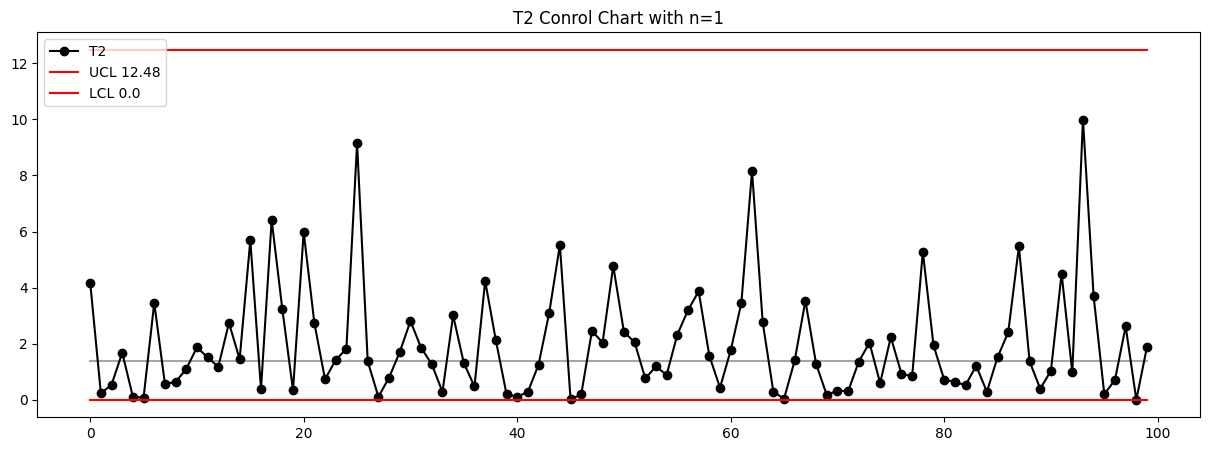

In [390]:
# This chart is for Phase I or Phase II 
# assuming mean vector mean1 and covariance matrix sigma cov1 are estimated using the Phase I data
# In this block, only Phase I data is plotted
# size is the number of variables
chart = Tsquare_single()
chart.fit(data=x, mu=mean1, sigma=cov1)
chart.ControlChart()

Phase II

In [391]:
dataPhaseIIarr =[dataPhaseII[['y1','y2']]]
dataPhaseIIarr

[         y1       y2
 0   19.0070  3.06248
 1   15.8642  1.42643
 2   18.5584  3.31967
 3   18.4586  2.42027
 4   15.1805  4.08682
 5   13.9162  2.15600
 6   21.2035  2.78811
 7   18.7396  3.45371
 8   14.6630  2.47455
 9   21.5389  2.93380
 10  14.9999  2.07993
 11  20.4689  4.06909
 12  18.4451  2.22109
 13  18.3939  3.25598
 14  21.1440  3.59908
 15  19.8316  3.41307
 16  18.9773  3.29723
 17  22.0645  2.30240
 18  19.2230  2.64564
 19  17.5390  2.50492
 20  21.8183  2.68581
 21  15.9978  2.52301
 22  19.4199  2.27729
 23  17.1247  3.66273
 24  18.8920  3.32500
 25  17.7501  3.26845
 26  15.9827  4.11585
 27  16.0378  3.37163
 28  19.5195  3.68337
 29  19.2262  1.15818
 30  15.5464  2.82252
 31  18.2574  2.91340
 32  16.3183  1.36028
 33  14.9400  3.11747
 34  19.2868  3.15074
 35  16.4086  1.21549
 36  17.0502  2.83501
 37  20.4672  5.48203
 38  18.4197  1.45871
 39  16.8850  1.71677
 40  15.5503  3.09539
 41  18.9409  2.96083
 42  21.5134  3.01760
 43  18.0643  1.73488
 44  20.86

In [392]:
# this np.reshape convert the list dataI into the proper subgroup and m=30
# sample size n=5 is used for X-bar and R or X-bar and S chart
x1=np.reshape(dataPhaseIarr, (100,2))
x1

array([[10.6424 ,  2.36723],
       [14.094  ,  2.70679],
       [16.4463 ,  2.86357],
       [12.481  ,  3.49823],
       [14.8288 ,  3.38062],
       [15.4986 ,  2.94089],
       [18.1712 ,  2.05572],
       [16.2308 ,  2.61631],
       [13.4792 ,  3.36159],
       [14.117  ,  1.9361 ],
       [14.4749 ,  4.46486],
       [17.4969 ,  3.61496],
       [13.3352 ,  2.09649],
       [13.949  ,  4.68546],
       [14.6177 ,  1.72947],
       [10.1771 ,  3.62369],
       [15.8735 ,  3.5925 ],
       [16.0014 ,  0.42532],
       [11.2366 ,  2.2918 ],
       [15.3799 ,  2.47218],
       [ 9.8013 ,  3.16742],
       [16.4225 ,  1.50788],
       [16.7719 ,  2.97379],
       [13.9469 ,  4.15259],
       [17.3446 ,  2.36699],
       [17.6218 ,  6.20852],
       [12.7403 ,  2.30741],
       [14.4338 ,  2.77957],
       [14.1232 ,  2.12323],
       [14.4082 ,  1.62192],
       [18.5641 ,  3.13863],
       [12.0441 ,  2.84845],
       [15.5157 ,  1.89346],
       [13.8452 ,  2.86982],
       [18.702

In [404]:
# compute column means
mean2=np.mean(x1, axis=0)
mean2

array([14.974384 ,  3.0424158])

In [397]:
# compute the covariance matrix
cov2 = np.cov(x1.T)
cov2

array([[4.6245344 , 0.31622662],
       [0.31622662, 1.18948543]])

In [398]:
# compute the inverse of the covariance matrix
matinv2 = np.linalg.inv(cov2)
matinv2

array([[ 0.22024176, -0.05855163],
       [-0.05855163,  0.85626571]])

In [401]:
class Tsquare_single:

    _title = "T-square Hotelling Chart"

    def fit(self, data, mu, sigma):

        self.data = np.array(data)
        self.numsample = len(data)
        self.size=len(mu) # size is # of variates p

        # colmean = np.mean(data, axis=0)
        # matcov = np.cov(data.T)
        matinv = np.linalg.inv(sigma)

        values = []
        for sample in self.data:
            dif = sample - mu
            value = matinv.dot(dif.T).dot(dif)
            values.append(value)
        
        self.T2=values
        self.cl = ((self.numsample - 1)**2) / self.numsample
        self.lcl = self.cl * beta.ppf(0.00135, self.size / 2, (self.numsample - self.size - 1) / 2)
        self.center = self.cl * beta.ppf(0.5, self.size / 2, (self.numsample - self.size - 1) / 2)
        self.ucl = self.cl * beta.ppf(0.99865, self.size / 2, (self.numsample - self.size - 1) / 2)

        #return (values, center, lcl, ucl, self._title)

    def ControlChart(self):
        ucl = np.zeros(self.numsample)
        lcl = np.zeros(self.numsample)
              
        for i in range(len(self.data)):
            lcl[i] = self.cl * beta.ppf(0.00135, self.size / 2, (self.numsample - self.size - 1) / 2)
            ucl[i] = self.cl * beta.ppf(0.99865, self.size / 2, (self.numsample - self.size - 1) / 2)
              
        plt.figure(figsize=(15,5))
        plt.plot(self.T2,marker="o",color="k",label="T2")
        plt.plot([self.center]*self.numsample,color="k",alpha=0.35)
        plt.plot(ucl,color="r",label="UCL {}".format(ucl[len(ucl)-1].round(2)))
        plt.plot(lcl,color="r",label="LCL {}".format(lcl[len(lcl)-1].round(2)))
        plt.title("T2 Conrol Chart Phase 2 with n=1")
        plt.legend(loc="upper left")
        plt.show()

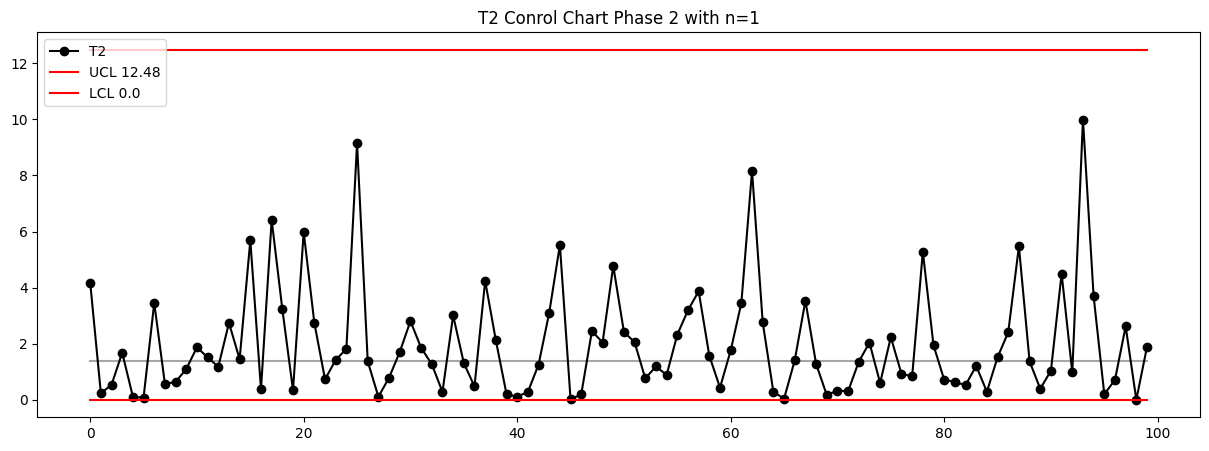

In [402]:
# This chart is for Phase I or Phase II 
# assuming mean vector mean1 and covariance matrix sigma cov1 are estimated using the Phase I data
# In this block, only Phase I data is plotted
# size is the number of variables
chart = Tsquare_single()
chart.fit(data=x1, mu=mean2, sigma=cov2)
chart.ControlChart()

# h.	

(10 points) Discuss the pros and cons of using univariate and multivariate control charts for this braiding process. The univariate control charting would involve two X-bar/R charts on y1 and y2 simultaneously. The multivariate control chart is the Hotelling T2 chart on y=(y1, y2) vector. Your discussion should include the outcome of this data set and the cases in general.

Solution part h: 

Multivariate control charts such as CUSUM, T2 and Multivariate EWMA (MEWMA) control chart, are good when trying to show how correlated, or dependent, variables jointly affect a process or outcome. T2 control charts are to detect shifts in the mean of more than one interrelated variable. CUSUM IS FOR SMALL deviation from mean – take all of the data up to that point if there is a small shift to detect it faster. Multivariate charts enable you to routinely monitor many tool process parameters with fewer charts. The objective would be to better understand whether out-of-control points in a multivariate chart may be used to anticipate quality issues as far as the product characteristics are concerned.Cons are that you cannot single out quality characteristics as well and if the process is out of control, you will detect it faster but the detection and solution to get the process back under contol will be harder since there are multiple dependent variables outlined in the charts. This is a pro for the univariate control charts because when the process is out of control, you can tell what variable and get the process back under control easier, but with univariate, the shift in mean might not be detected as early. 